In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import stylecloud
from IPython.display import Image
import matplotlib.pyplot as plt
from itertools import product

In [2]:
!pip install stylecloud


In [12]:
df = pd.read_csv('tripadvisor_mbs_review_from201501_v2.csv', encoding='latin1')


In [13]:
df.shape

(10232, 6)

In [14]:
df.head()

,user_id,contributions,date_of_stay,ratings,title,content
0,1,0,2022/8,5,Great stay,Whole team was great and service 10/10. Receiv...
1,2,81,2022/7,5,MBS a luxurious destination,"We are a family of 6 ( my 85 yearold father, 7..."
2,3,6,2022/8,5,MBS truly understands their clients!,"Throughout my stay, I felt that this establish..."
3,3,13,2016/3,4,Wonderful Hotel but the service isn't really e...,I would say the architect of this hotel is fas...
4,4,205,2022/10,5,Amazing hotel,"Amazing hotel, the check-in staff member was e..."


In [8]:
# no review duplicity
df['content'].nunique()

10231

In [9]:
# number of user id 
df['user_id'].nunique()

9782

In [10]:
df['contributions'].value_counts().to_frame()
# might be useful to analyse by 

,contributions
1,305
2,244
3,233
5,198
4,182
...,...
645,1
1938,1
883,1
749,1


In [11]:
df['ratings'].value_counts().to_frame()
# might be useful to analyse by 

,ratings
5,6158
4,2414
3,993
2,334
1,333


In [12]:
df.groupby(['contributions','date_of_stay'],as_index=False)['user_id'].count()

,contributions,date_of_stay,user_id
0,0,2016/8,1
1,0,2016/9,1
2,0,2017/11,1
3,0,2017/12,1
4,0,2017/2,1
...,...,...,...
6654,22174,2016/6,1
6655,26045,2018/9,1
6656,26045,2022/6,1
6657,37937,2017/11,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        10232 non-null  int64 
 1   contributions  10232 non-null  int64 
 2   date_of_stay   9917 non-null   object
 3   ratings        10232 non-null  int64 
 4   title          10232 non-null  object
 5   content        10232 non-null  object
dtypes: int64(3), object(3)
memory usage: 479.8+ KB


In [16]:
# Filter rows with ratings 1, 2, or 3
df = df[df['ratings'].isin([1, 2, 3])]


In [17]:
df['ratings'].value_counts()

3    993
2    334
1    333
Name: ratings, dtype: int64

In [18]:
df.head()

,user_id,contributions,date_of_stay,ratings,title,content
5,5,53,2022/10,2,The pool is nice but hotel room and service is...,"You can go there for casino and infinity pool,..."
8,8,1,2022/9,1,Debit card charged without refund after check ...,Stay from 05 sep to 08 sep 2022. Hotel request...
12,12,1,2022/10,3,A Hotel that is heaven for Adults but not grea...,We arrived in Singapore as a family. Beforehan...
18,16,26,2018/6,3,Overpriced,This is an impressive hotel to look at. The ro...
22,18,21,2022/9,3,Disneyland on heat !,If you are looking for luxurious personal serv...


In [20]:
df.shape

(1660, 6)

EDA with Word Clouds on 1-2 star ratings

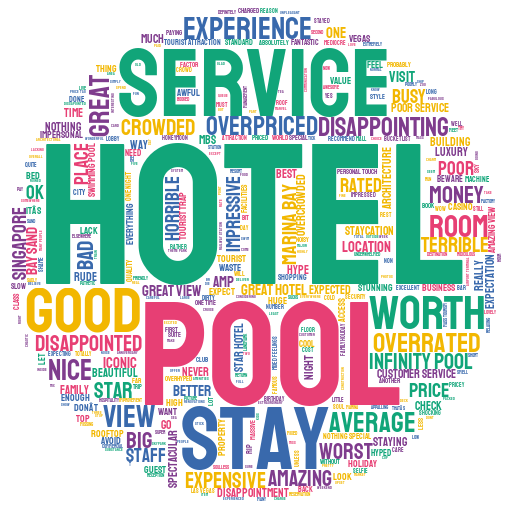

In [53]:
# Review Title
text_leisure = ' '.join(df.title)
stylecloud.gen_stylecloud(text = text_leisure,
                         icon_name='fas fa-circle')
Image(filename='stylecloud.png')

# REVIEW_TITLE indicate that the negative thing wrt MBS Hotel is overpriced, rude 
# crowded and busy 

In [ ]:
#data preprocessing

In [22]:
## Spelling was manually corrected as autocorrections from textblob was wrongly correcting valuable keywords. 



## remove accented characters
# imports
import unicodedata# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text# call function

import re
contraction_dict = {"ain't": "is not", "aint": "is not", "aren't": "are not", "arent": "are not", "can't": "cannot", 
                    "cant": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                    "couldnt": "could not", "didn't": "did not", "didnt": "did not",  
                    "doesn't": "does not", "don't": "do not", "dont": "do not", "hadn't": "had not", "hadnt": "has not", 
                    "hasn't": "has not", "hasnt": "has not", "havent": "have not",
                    "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                    "I'm": "I am", "Im": "I am", "I've": "I have", "Ive": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "ive": "i have",
                    "isn't": "is not", "isnt": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                    "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                    "mayn't": "may not", "might've": "might have","mightn't": "might not",
                    "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                    "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                    "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                    "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                    "that's": "that is", "thats": "that is", "there'd": "there would", "there'd've": "there would have", 
                    "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                    "they've": "they have", "to've": "to have", "wasn't": "was not", "wasnt": "was not", "we'd": "we would", 
                    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                    "we're": "we are", "we've": "we have", "weren't": "were not", "werent": "were not", "what'll": "what will", 
                    "what'll've": "what will have", "what're": "what are",  "what's": "what is", 
                    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                    "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                    "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", 
                    "will've": "will have", "won't": "will not", "wont": "will not", "won't've": "will not have", 
                    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                    "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                    "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
                    "you're": "you are", "youre": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# imports
import re# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, ' ', text)
 

# imports
import re# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 
# imports
import string# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text# call function


# imports
import re# function to remove extra white spaces
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()# call function


# function to change text to lower case
def to_lowercase(text):
    return text.lower()# call function



In [23]:
# imports
import nltk
from nltk.tokenize import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# custom: removing words from list
stopword_list.remove('not')# function to remove stopwords


def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text# call function

In [24]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
def get_wordnet_pos(word):                        ##### WHAT DOES THIS FUNCTION DO?
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

def pos_lemmatizer(x):
    x = " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)])
    return x



In [25]:
def text_preprocessing(x):
    ###

    ## expanding contractions
    x = replace_contractions(x)
    ## remove acented characters
    x = remove_accented_chars(x)
    ## remove special characters
    x = remove_special_characters(x)
    ## remove numbers
    x = remove_numbers(x)
    ## remove punctuations
    x = remove_punctuation(x)
    ## remove stopwords
    x = remove_stopwords(x)
    ## remove extra white spaces
    x = remove_extra_whitespace_tabs(x)
    ## make lowercase
    x = to_lowercase(x)
    ## lemmatisation using pos
    x = pos_lemmatizer(x)
    return x

In [26]:
%%time
df['clean_text']= df['content'].apply(text_preprocessing)

CPU times: user 19.7 s, sys: 2.26 s, total: 21.9 s
Wall time: 22 s


In [27]:
df.head()

,user_id,contributions,date_of_stay,ratings,title,content,clean_text
5,5,53,2022/10,2,The pool is nice but hotel room and service is...,"You can go there for casino and infinity pool,...",go casino infinity pool not attracti infinity ...
8,8,1,2022/9,1,Debit card charged without refund after check ...,Stay from 05 sep to 08 sep 2022. Hotel request...,stay sep sep hotel request security deposit sg...
12,12,1,2022/10,3,A Hotel that is heaven for Adults but not grea...,We arrived in Singapore as a family. Beforehan...,arri have singapore family beforehand arri hav...
18,16,26,2018/6,3,Overpriced,This is an impressive hotel to look at. The ro...,impressi hotel look rooftop pool impressi room...
22,18,21,2022/9,3,Disneyland on heat !,If you are looking for luxurious personal serv...,look luxurious personal service hotel not swim...


In [28]:
%%time
## word frequency
word_count = df.clean_text.str.split(expand=True).stack().value_counts().to_frame().reset_index()



CPU times: user 165 ms, sys: 32.2 ms, total: 198 ms
Wall time: 198 ms


In [29]:
word_count.columns = ['word', 'count']

In [30]:
word_count  ### A LOT OF MISSPELLED WORDS

,word,count
0,not,4247
1,hotel,4040
2,room,3609
3,pool,2631
4,stay,1481
...,...,...
8737,concent,1
8738,disclaimer,1
8739,ucrealised,1
8740,reschedule,1


In [31]:
word_count.to_csv('word_count.csv',index=True)

In [32]:
## Adding new stopwords from manually identify useless words + words that appear less than 6 times in the dataset
new_stopwords = ['go', 'grung', 'pickup', 'resolve', 'chinice', 'bow', 'single', 'equipmentwhich', 'plantsflowers', 'slum', 'protect', 'shear', 'taped', 'intersperse', 'pile', 'gimmickry', 'madam', 'thr', 'mahout', 'writer', 'hint', 'tantamount', 'caters', 'badingen', 'religion', 'herald', 'dam', 'gelatissimo', 'jumper', 'ranger', 'importantly', 'shrimp', 'smurf', 'subservient', 'selfish', 'midweek', 'allaaaand', 'diplodoci',
'get', 'monstrous', 'viewer', 'develop', 'cantonese', 'jackie', 'que', 'keeperi', 'conducive', 'gender', 'grown', 'observant', 'weave', 'yuck', 'grade', 'maximize', 'snooty', 'caz', 'stunt', 'command', 'finale', 'expensivein', 'advertisement', 'ohne', 'iran', 'experiencenot', 'pricy', 'misjudge', 'onsite', 'innovation', 'respond', 'insomnia', 'jolly', 'reposition', 'timetable', 'mound', 'marriage', 'amatuer',
'animal', 'horticultural', 'FALSE', 'source', 'unpleasantly', 'tarzan', 'via', 'respectablehe', 'bra', 'accommodation', 'damage', 'indianpakistanibangladeshi', 'creep', 'bandaids', 'blasting', 'primarily', 'uphill', 'erratic', 'esplanade', 'anothers', 'blaring', 'antithesis', 'politely', 'trainyou', 'francisco', 'minutesheded', 'balance', 'pumpkinsmy', 'reconsider', 'bcz', 'ridge', 'leant', 'indifference', 'nostalgic', 'ancient', 'unidentifiable', 'jagrata', 'gamble',
'singapore', 'inclination', 'rear', 'grrrrrrrr', 'delicacy', 'dio', 'realise', 'optional', 'ques', 'waitingthen', 'furniture', 'racial', 'flea', 'mate', 'mail', 'connects', 'ugh', 'undo', 'manipulate', 'uo', 'pensioner', 'forfeit', 'washroom', 'perplex', 'waisted', 'happenedarrived', 'impractical', 'whew', 'notable', 'satisfactory', 'chapel', 'livestock', 'medical', 'overbuilt', 'lap', 'breeding', 'deerinothing', 'dave',
'visit', 'tcc', 'exploit', 'salesperson', 'showy', 'bullhooks', 'literally', 'hypo', 'cynical', 'muchif', 'boast', 'overtone', 'ethic', 'promo', 'communication', 'placessorry', 'limitation', 'commercialism', 'stuffy', 'experirnce', 'deg', 'cajole', 'auditorium', 'pefect', 'mature', 'mythology', 'rider', 'missable', 'refundable', 'confiscate', 'driven', 'manoeuvre', 'bundle', 'soup', 'efficiently', 'cheeper', 'irritant', 'budgetit',
'would', 'sighting', 'canada', 'snatch', 'laughter', 'cruddy', 'venue', 'shenzhen', 'experiential', 'amal', 'refreshment', 'carefull', 'crab', 'fairground', 'fortunately', 'colorless', 'blatant', 'capitalism', 'damn', 'pokemon', 'protection', 'bumped', 'uber', 'incomplete', 'disapointment', 'lingers', 'promptly', 'sanitise', 'travesty', 'versa', 'expose', 'wolve', 'luge', 'cocked', 'asiatic', 'alysaes', 'mural', 'utmost',
'well', 'cantilever', 'frighten', 'spat', 'underwent', 'sketchy', 'choose', 'memorise', 'fold', 'wildebeest', 'patch', 'soulless', 'spartan', 'ounce', 'connect', 'tribal', 'kia', 'timeslot', 'op', 'overcast', 'motion', 'cane', 'assist', 'erode', 'kuta', 'ambiance', 'condescend', 'mapping', 'ledge', 'vice', 'enthusiastic', 'entranceexpecting', 'overcame', 'trend', 'mock', 'comply', 'relict', 'inefficiency',
'one', 'wellcoming', 'botanics', 'rainbow', 'closedreplacing', 'theonly', 'somewhere', 'angryi', 'appoint', 'orangoutangs', 'sharp', 'masked', 'populate', 'capybara', 'steel', 'italy', 'haggle', 'sentence', 'bull', 'chrismas', 'hair', 'derelict', 'worship', 'participle', 'argument', 'fireplay', 'showcased', 'ethnic', 'unclear', 'individually', 'coke', 'busload', 'vey', 'faceless', 'engineering', 'spikey', 'catino', 'nurul',
'take', 'anderson', 'test', 'pickpocketed', 'macdonald', 'areaavoid', 'twice', 'trapsvisit', 'alcoholic', 'anxiety', 'tidy', 'inspect', 'lanka', 'glorious', 'dessert', 'margarita', 'napkin', 'retrospect', 'sri', 'optimise', 'queensland', 'parkaait', 'flop', 'hyaena', 'relaxation', 'arent', 'tailor', 'geylang', 'behaving', 'appointment', 'concierge', 'bitey', 'smallish', 'fifth', 'joint', 'habituate', 'ordeal', 'sataybut',
'people', 'frustratingly', 'wisely', 'credible', 'hug', 'uncharacteristic', 'attend', 'templeclassic', 'astronomical', 'zoochsis', 'clue', 'reveal', 'scape', 'thatll', 'anyhow', 'evaluation', 'teamlab', 'cheaply', 'microphone', 'contradict', 'tripod', 'casualty', 'measure', 'linguistically', 'dumb', 'tada', 'anime', 'rodent', 'freeze', 'unmaintained', 'spicy', 'poaitive', 'riotand', 'sidestep', 'junky', 'razz', 'dissuade', 'rubberywe',
'much', 'imposition', 'compulsory', 'carrot', 'georgette', 'chan', 'apart', 'insidethey', 'mythical', 'derive', 'forgot', 'lunchbrunchdinner', 'refurbish', 'takena', 'brave', 'internse', 'lawrence', 'habourfront', 'harass', 'retains', 'linger', 'euthanasia', 'receives', 'prevail', 'seenot', 'threat', 'role', 'gentrification', 'origin', 'hilton', 'insanely', 'adverse', 'animalbird', 'cinematic', 'altogether', 'tragedy', 'aweful', 'tablemenu',
'like', 'considerably', 'blurry', 'invalid', 'sanatised', 'inmate', 'certain', 'integrate', 'tixs', 'maxx', 'coast', 'inspection', 'inconveniently', 'drawing', 'sham', 'rivercruise', 'ineffective', 'allthere', 'wedding', 'aid', 'deep', 'fad', 'link', 'diction', 'disappoints', 'danger', 'wound', 'ayer', 'collision', 'lionfish', 'bitten', 'rinforest', 'pause', 'baba', 'determine', 'passionate', 'cobble', 'nonexistent',
'u', 'subside', 'beaten', 'superb', 'har', 'kiss', 'sat', 'insidedont', 'onwards', 'costco', 'dog', 'pakistansri', 'au', 'tricked', 'wither', 'squirel', 'tissue', 'unsophisticated', 'publicity', 'cabinet', 'captain', 'torturous', 'pet', 'ihm', 'chester', 'glamarab', 'identical', 'botherered', 'respective', 'guardget', 'dissatisfied', 'distraction', 'walkno', 'ikea', 'tucked', 'archaic', 'trialino', 'prohibition',
'really', 'wrought', 'superficial', 'buidlings', 'reminds', 'reverse', 'slightly', 'novel', 'clarity', 'prioritise', 'there', 'nepal', 'ticketsbut', 'lotus', 'apparent', 'wee', 'tiffany', 'revise', 'puma', 'globalization', 'oily', 'offor', 'finger', 'gall', 'animalsthe', 'expel', 'g', 'oxford', 'carnival', 'creathresand', 'eventhough', 'misinformation', 'shocker', 'remarkable', 'rabbit', 'tassles', 'lineup', 'sadlythe',
'around', 'prestige', 'everybody', 'inaudible', 'clicquot', 'exodus', 'today', 'rash', 'rolex', 'clog', 'press', 'nicha', 'amenity', 'kongs', 'loop', 'coexistence', 'shamble', 'pvc', 'impact', 'apple', 'flavor', 'feltthey', 'development', 'christmassy', 'boar', 'wok', 'appreciation', 'labanese', 'endorse', 'gimmicky', 'repaint', 'downright', 'rideone', 'hideout', 'endure', 'parkthen', 'ache', 'studiosso',
'even', 'ionbut', 'demonstrate', 'legitimately', 'paw', 'astound', 'cross', 'storyboards', 'seventy', 'ho', 'own', 'pleaser', 'flood', 'wateringly', 'cny', 'exposition', 'unpredictable', 'namesake', 'historic', 'lust', 'horribly', 'jewel', 'authenticity', 'weirdly', 'context', 'uniqlo', 'urge', 'wonderfully', 'autistic', 'encountersits', 'colonist', 'monetary', 'suffocatingthey', 'thereafter', 'sequence', 'tassel', 'fever', 'animalshe',
'could', 'independence', 'serf', 'utilisation', 'estate', 'irate', 'easily', 'awfully', 'deposit', 'thd', 'sway', 'jul', 'soothe', 'nparks', 'desperate', 'mediterranean', 'thirdly', 'shortest', 'treasure', 'abercrombie', 'stella', 'vaguely', 'fabric', 'peoplekids', 'recognize', 'prohibits', 'pavilion', 'kreta', 'mat', 'moneyi', 'overflow', 'aboutreview', 'questthe', 'asher', 'spiritual', 'taint', 'clinic', 'locationswe',
'make', 'trailfinders', 'color', 'chimpazees', 'veuve', 'scenario', 'pick', 'decontextualized', 'graphic', 'ticketsone', 'vegetarian', 'dosas', 'bursting', 'nea', 'gorgeous', 'vegetal', 'hermes', 'pathwalk', 'investigate', 'substantially', 'instantly', 'beerfirst', 'ad', 'lissabon', 'freshly', 'eyeball', 'occupy', 'culturised', 'coordinate', 'vibrancy', 'applaud', 'dismiss', 'dense', 'production', 'remnant', 'curlingly', 'dengue', 'impatience',
'many', 'hostel', 'gruesome', 'singage', 'creeped', 'copious', 'oh', 'postmoderne', 'liquid', 'inadequatenothing', 'happens', 'eats', 'shady', 'unlit', 'september', 'upclose', 'memorial', 'sadit', 'unorganized', 'spillway', 'petroscience', 'funan', 'tend', 'propped', 'institution', 'terrorize', 'worthless', 'continually', 'hoard', 'lu', 'serpentine', 'eventenclosure', 'vomit', 'weekendhellish', 'lone', 'apr', 'phils', 'upwe',
'want', 'flee', 'melbourne', 'reassure', 'thunderstorm', 'regiment', 'cause', 'dominance', 'switch', 'dispirit', 'magical', 'showthe', 'rake', 'marang', 'insane', 'raincoat', 'migrant', 'runningpushingshoving', 'facebook', 'fitch', 'curse', 'font', 'doesnt', 'maximisation', 'goodwill', 'lifeguard', 'maxwell', 'eject', 'itbut', 'enforceremind', 'pun', 'ma', 'vilasand', 'dangerously', 'myth', 'hoofed', 'priceda', 'longwe',
'back', 'wowd', 'bummer', 'criticise', 'extraordinarily', 'hyenaand', 'usually', 'xiv', 'mindful', 'underway', 'specifically', 'wouldnot', 'guanzhong', 'abound', 'volume', 'approve', 'fuzzy', 'scienceis', 'edition', 'luxe', 'tapped', 'lisa', 'sanctuary', 'ticketes', 'iteven', 'summit', 'merge', 'commitment', 'disgraceful', 'estimation', 'intent', 'blend', 'pedestrianjogging', 'debrief', 'breastfeeding', 'checker', 'midpoint', 'efficiency',
'pm', 'crampedrushed', 'escort', 'chatrine', 'humorous', 'fi', 'doubt', 'accomplishment', 'kao', 'troop', 'medium', 'hereit', 'warren', 'soggy', 'cope', 'fpr', 'zara', 'windwalker', 'grossly', 'enticement', 'worried', 'mona', 'san', 'perch', 'piss', 'singapre', 'awhile', 'magnet', 'upkeep', 'deductible', 'error', 'timehowever', 'foxglove', 'snorefest', 'drill', 'pachyderm', 'coldly', 'jerky',
'area', 'loan', 'offs', 'heroic', 'champagne', 'wi', 'stood', 'monotone', 'tortuous', 'idly', 'wherever', 'ir', 'luggage', 'prioritize', 'recycle', 'uniquely', 'substandard', 'mayhem', 'eagle', 'tease', 'disrupt', 'hostile', 'occasionally', 'hyderabad', 'uncomfy', 'businessman', 'stalactite', 'delighted', 'burnt', 'newer', 'conduct', 'dank', 'komala', 'aa', 'colonial', 'spinner', 'mob', 'chimp',
'say', 'abuts', 'indochine', 'dramatic', 'jem', 'wort', 'okay', 'reclaim', 'nearer', 'duly', 'depend', 'camenow', 'cartier', 'guild', 'allocate', 'tawdry', 'outdated', 'itu', 'ironically', 'reccomended', 'etickets', 'gallerymuseum', 'pow', 'norm', 'quaint', 'salt', 'prevent', 'tedious', 'wouldve', 'dodgy', 'consists', 'orlando', 'herewe', 'sooooo', 'easter', 'areahowever', 'swissotel', 'plantstrees',
'also', 'traipse', 'berlin', 'menacingly', 'unsuspecting', 'rerar', 'rd', 'nostalgia', 'mutter', 'clientele', 'paradise', 'splendid', 'drum', 'unsuccessful', 'presumably', 'finde', 'spout', 'jurongpark', 'kl', 'achieve', 'smartphones', 'petty', 'remote', 'stature', 'wannabe', 'daytona', 'mixed', 'despondent', 'unit', 'seedo', 'enable', 'voiced', 'buggyteam', 'generation', 'frank', 'goodbye', 'hugh', 'turaco',
'come', 'offeres', 'thumb', 'parapet', 'spiderman', 'updise', 'whether', 'ininteresting', 'doze', 'anzac', 'cooking', 'viewkids', 'matsuri', 'dumpling', 'contrive', 'fluently', 'handicapped', 'experiencebut', 'glam', 'dom', 'werent', 'commentates', 'fauna', 'reunion', 'beautifully', 'nook', 'staircase', 'starsreviewed', 'scurry', 'petrify', 'respite', 'commotion', 'hubby', 'walkabout', 'pillow', 'dirtywe', 'tge', 'onlyit',
'lot', 'devour', 'fairness', 'nametag', 'autheticity', 'chand', 'st', 'medley', 'overpower', 'negate', 'painting', 'flyerits', 'dip', 'da', 'bank', 'infinitely', 'salvage', 'payingbetter', 'benefit', 'gaden', 'explorer', 'minuter', 'ultimately', 'befit', 'blast', 'grid', 'ny', 'lido', 'scamming', 'torment', 'concentrate', 'marcus', 'poorer', 'enthuse', 'extinction', 'congratulation', 'roadunfortunately', 'etcno',
'thing', 'interensting', 'resturants', 'wary', 'hero', 'lemurian', 'exactly', 'slice', 'kitsch', 'dread', 'amphitheatre', 'spill', 'clearing', 'account', 'bali', 'lochness', 'polished', 'filth', 'fyi', 'stell', 'outcome', 'interpret', 'mc', 'smug', 'clad', 'bumpy', 'administration', 'cooperate', 'october', 'impossibly', 'commercialize', 'proof', 'stray', 'consultant', 'inclement', 'feeble', 'usable', 'hereyou',
'great', 'vacuum', 'tat', 'khao', 'bleak', 'eq', 'particular', 'musical', 'france', 'deliberately', 'ate', 'entwine', 'glitzy', 'dupe', 'installation', 'obnoxious', 'apologetic', 'buildingthis', 'server', 'chargable', 'amd', 'animalsnot', 'refer', 'dialogue', 'offence', 'grandstand', 'award', 'seoul', 'avoidable', 'emotional', 'prime', 'movingalarm', 'demarcation', 'molar', 'king', 'moneynot', 'equinox', 'militantstand',
'little', 'swallow', 'quantity', 'expression', 'confront', 'ticvkets', 'b', 'rink', 'overhaul', 'rfid', 'van', 'brew', 'behold', 'wasteful', 'vantage', 'cheep', 'radio', 'advertisedwhilst', 'flock', 'instructor', 'skeleton', 'bout', 'sam', 'viewsightexperience', 'inhabitant', 'outlay', 'stifle', 'vacant', 'ethical', 'retreat', 'aunt', 'allocation', 'juicy', 'posse', 'takashimaya', 'priceywaste', 'alongside', 'photographerseven',
'give', 'glitz', 'prayer', 'tense', 'pacific', 'hhr', 'apparently', 'lunchbat', 'cookie', 'landyard', 'shake', 'sexy', 'weigh', 'watery', 'rise', 'skater', 'harry', 'traumatic', 'cleanest', 'sightseeng', 'belongs', 'abhorrent', 'cruel', 'trudge', 'appropriately', 'seaters', 'unesco', 'islend', 'bedding', 'admirable', 'study', 'expencive', 'isnot', 'interrupt', 'disappear', 'membersride', 'wordy', 'greatbut',
'need', 'troll', 'england', 'peculiar', 'plucked', 'unmanageable', 'four', 'animalsbabd', 'rental', 'registration', 'intimidate', 'trademarked', 'murky', 'arrivedwith', 'mainland', 'bang', 'downhill', 'reccomend', 'considerable', 'mutiny', 'salmon', 'fullfilling', 'backpacker', 'inevitable', 'rochor', 'unqualified', 'lizard', 'orangutang', 'shopkeeper', 'speech', 'inch', 'misleadingly', 'staffgardeners', 'nu', 'gesture', 'preacher', 'pi', 'tern',
'quite', 'moist', 'horrific', 'waaaaaay', 'mania', 'ohhh', 'third', 'trunk', 'cutter', 'schoolboy', 'unnatural', 'inauthentic', 'lorry', 'pathetically', 'grumpy', 'dissappintment', 'existence', 'zigzag', 'crush', 'sporadically', 'sushi', 'consult', 'discourage', 'mentality', 'crash', 'beautifulnor', 'stunningly', 'poked', 'caution', 'cola', 'chill', 'gm', 'cozy', 'university', 'appearance', 'wield', 'sparkly', 'coolingexpensive',
'first', 'foodordered', 'wrongly', 'twycross', 'midway', 'headache', 'throughout', 'skeletal', 'insight', 'recoup', 'replace', 'patriotic', 'universally', 'laundry', 'knee', 'woth', 'reprimand', 'lad', 'meander', 'affected', 'sensitive', 'iventure', 'miniature', 'tlc', 'svc', 'grill', 'contemporary', 'santhosa', 'privacy', 'coca', 'hindsight', 'bro', 'faint', 'farce', 'horrify', 'wafer', 'thounsand', 'kiwi',
'another', 'oppose', 'whisper', 'keow', 'manet', 'linessave', 'truly', 'skate', 'pump', 'billion', 'jammed', 'dane', 'evidently', 'jerry', 'wise', 'oath', 'looooong', 'heckle', 'disturbed', 'laterand', 'fund', 'deter', 'itinerary', 'inherent', 'lamp', 'fewminutes', 'pad', 'annimals', 'assure', 'twilight', 'wrs', 'malayindo', 'longaanot', 'rex', 'belt', 'coeliac', 'denominator', 'birdpark',
'try', 'brit', 'recreate', 'crazily', 'thevold', 'confident', 'neither', 'punter', 'decorate', 'snacksdrinks', 'proceed', 'understudy', 'peek', 'ben', 'count', 'cisarua', 'upto', 'ted', 'exterior', 'frenzied', 'cinema', 'quotation', 'communicate', 'understandably', 'pleasantly', 'laksa', 'meaningful', 'travell', 'coin', 'prob', 'david', 'filipino', 'mary', 'locomotion', 'horror', 'christian', 'frequency', 'discuss',
'seem', 'sakecompletely', 'modernise', 'excruciatingly', 'tate', 'showthat', 'e', 'usthey', 'perth', 'imminent', 'kick', 'kimd', 'henderson', 'blindfold', 'depress', 'nonetheless', 'pair', 'trama', 'anniversary', 'outragious', 'intelligent', 'privately', 'steer', 'muthus', 'seedy', 'mingle', 'flier', 'hilly', 'coverage', 'thereits', 'feather', 'outer', 'impeccably', 'diet', 'unavailable', 'ordain', 'forwardbut', 'docent',
'think', 'wilderness', 'archaeologist', 'hesitation', 'watchful', 'sugercane', 'info', 'isolated', 'unkept', 'incoming', 'verdict', 'dcandinavian', 'relevance', 'stereotype', 'circumstance', 'taman', 'atmospheric', 'commentator', 'walker', 'colombian', 'clown', 'fe', 'nephew', 'komalas', 'gloomy', 'forbid', 'avenue', 'pushchair', 'stupidity', 'cabana', 'attenborough', 'crsytal', 'attendance', 'dumbed', 'variation', 'tome', 'gardenconservatory', 'heshe',
'can', 'snorkel', 'frazzle', 'foodavoid', 'fluorescent', 'tussaud', 'act', 'kiddy', 'spiritually', 'grandparent', 'unacceptable', 'commonwealth', 'philosophy', 'appropriation', 'blank', 'lakeside', 'balm', 'amid', 'fortunate', 'domesconservatories', 'currumbin', 'ironic', 'independently', 'redeemable', 'sinagpore', 'dior', 'waist', 'annimls', 'uncle', 'tenderness', 'niece', 'squalor', 'transplant', 'lightly', 'eco', 'submission', 'aloud', 'tighter',
'end', 'neglect', 'pray', 'blur', 'bearly', 'bikestop', 'mb', 'postmodernism', 'lee', 'intonation', 'demand', 'processtook', 'terrific', 'oooh', 'yard', 'seperately', 'oz', 'taught', 'presence', 'sleeve', 'monotonous', 'boycott', 'sandwich', 'signal', 'heartbreaking', 'homegrown', 'brain', 'surety', 'ventilation', 'beneficial', 'donate', 'vincent', 'habitant', 'acquire', 'ambassador', 'ensues', 'cincinnati', 'hotno',
'told', 'getter', 'postcard', 'leak', 'golden', 'distressful', 'pic', 'spattering', 'beg', 'plebe', 'shift', 'inaccessible', 'forgiven', 'centera', 'indonesia', 'confess', 'busier', 'miserably', 'glorify', 'd', 'desperately', 'donalds', 'solo', 'callously', 'satays', 'rad', 'combo', 'yield', 'choked', 'confines', 'jacket', 'phrase', 'sideshow', 'vienna', 'marine', 'theoughout', 'cam', 'foodexpensive',
'feel', 'ourselfes', 'panicked', 'botherit', 'imo', 'preface', 'x', 'foundation', 'sancturies', 'jabber', 'sweet', 'handicraft', 'spore', 'cockroach', 'vend', 'overbusy', 'situate', 'lily', 'abstract', 'cabby', 'promotes', 'contribution', 'february', 'seamless', 'inspiration', 'moral', 'dream', 'dlls', 'chimpanzee', 'evil', 'admittance', 'disingenuous', 'worh', 'smithsonian', 'fifteen', 'culturally', 'extortionate', 'familyfriends',
'use', 'pavillion', 'jumbled', 'gush', 'certify', 'cya', 'thus', 'visiti', 'forecast', 'abc', 'ta', 'overorganised', 'gradual', 'juggler', 'six', 'handyphone', 'joking', 'ness', 'anger', 'personality', 'detour', 'documentation', 'pp', 'persistently', 'mutton', 'suntec', 'huh', 'mayby', 'domesticate', 'themecloud', 'flexibility', 'pivotal', 'graffiti', 'lkcnhm', 'cleaning', 'granny', 'admissionhowever', 'welfarethis',
'whole', 'narrative', 'anxious', 'aluminium', 'tipple', 'gutted', 'assume', 'civilisation', 'disembarked', 'mustard', 'native', 'korean', 'flexible', 'youthank', 'relative', 'mouthwatering', 'brake', 'countdown', 'guilty', 'blog', 'louis', 'thicket', 'lifeless', 'deco', 'shiver', 'collegue', 'circuit', 'negotiable', 'expedition', 'fridge', 'bum', 'unprepared', 'flowerson', 'genius', 'revenue', 'insipid', 'jurassic', 'timemoney',
'ask', 'loft', 'potter', 'outrage', 'behavioural', 'waxwork', 'indeed', 'findhile', 'embark', 'youngster', 'cheetah', 'tahnthis', 'offwe', 'rang', 'cactus', 'murtabak', 'string', 'zoosafari', 'promenade', 'backdrop', 'ivory', 'selfiephotos', 'gather', 'misplace', 'topless', 'unpolite', 'contains', 'hallow', 'immigrant', 'kg', 'enthusiasm', 'gradens', 'numberous', 'hopscotch', 'contain', 'seatinghowever', 'milwaukee', 'rode',
'part', 'desparately', 'oven', 'proces', 'disturbance', 'daze', 'spoke', 'monestary', 'galore', 'oligarch', 'goggles', 'fooddrinks', 'stumble', 'segment', 'script', 'zamzam', 'disapointed', 't', 'genuine', 'stucked', 'completion', 'lsndscape', 'advertises', 'gardensmarina', 'flew', 'giggle', 'handbag', 'instinctively', 'beeing', 'perspex', 'versus', 'cheek', 'troubled', 'orchestra', 'clip', 'drowsy', 'sondaughter', 'dearer',
'felt', 'macdonalds', 'nigh', 'involvent', 'incredulously', 'showit', 'forth', 'brochurezoo', 'diverse', 'chinorussian', 'tasteless', 'walkingeating', 'sustain', 'bottomline', 'harsh', 'masjid', 'ing', 'antlops', 'drizzle', 'detriment', 'cramp', 'tripthis', 'january', 'stockholm', 'appalled', 'embarrasingly', 'fade', 'puffed', 'availability', 'optic', 'curry', 'homeyou', 'tick', 'sperm', 'wax', 'deadthey', 'stamford', 'opportunist',
'left', 'macaw', 'flounder', 'agohowever', 'conversionamalgamation', 'yetjust', 'eg', 'curation', 'bath', 'gambler', 'convenient', 'displace', 'plantation', 'embellish', 'reaction', 'unreliable', 'pier', 'assistant', 'apologize', 'sukkulent', 'reference', 'aggravation', 'tax', 'lower', 'slept', 'brusquely', 'uncouth', 'organizes', 'cordoned', 'ritchie', 'luqman', 'trais', 'alrdy', 'whale', 'abrupt', 'therebut', 'singel', 'charlatan',
'arrive', 'treetop', 'formality', 'domeyou', 'dazzle', 'worthwhileor', 'ce', 'pricier', 'wednesday', 'zealand', 'unfortunate', 'kamalas', 'strategically', 'mabbett', 'mini', 'suntech', 'parkpool', 'cheerful', 'closely', 'footage', 'litter', 'wmacro', 'asphalt', 'violence', 'blown', 'managementmanager', 'cie', 'rachel', 'hesitant', 'mac', 'panic', 'abolish', 'animalssnd', 'mammal', 'torn', 'glib', 'ambiguous', 'invent',
'two', 'allowi', 'ed', 'urine', 'juat', 'transportationget', 'somewhat', 'yacht', 'gawk', 'ly', 'rightly', 'upand', 'creation', 'youkatie', 'quicker', 'unintelligible', 'atrocious', 'idle', 'construct', 'sdg', 'text', 'shtours', 'commercialise', 'manic', 'biological', 'heck', 'bee', 'esoteric', 'disregard', 'itthe', 'breed', 'gonto', 'artificiality', 'centreexhausting', 'sip', 'visual', 'sprinkler', 'geo',
'saw', 'safar', 'everwhere', 'quickley', 'reaise', 'buskeeping', 'directly', 'bistro', 'recreation', 'townwith', 'health', 'ecstatic', 'dishearten', 'karma', 'description', 'practicality', 'slipper', 'grip', 'prevents', 'queueas', 'sultan', 'presumptuous', 'chef', 'layover', 'kingdom', 'abit', 'field', 'cholce', 'cycling', 'animalsi', 'receipt', 'fascinatin', 'stool', 'duh', 'warrant', 'juggling', 'undeniably', 'upeven',
'enter', 'whitewash', 'lioness', 'riverlands', 'tomato', 'idiot', 'form', 'forum', 'uneasy', 'aug', 'h', 'literature', 'starve', 'enlighten', 'handy', 'recite', 'decline', 'expectatilns', 'humiliate', 'trambus', 'correctly', 'cambodia', 'confusion', 'arboretum', 'amphitheater', 'roundtrip', 'consume', 'becuz', 'release', 'darki', 'hotline', 'mny', 'snooze', 'disco', 'overbooked', 'hygienic', 'identity', 'nat',
'still', 'icy', 'shoot', 'glide', 'fied', 'equal', 'period', 'suagr', 'macho', 'dino', 'overlook', 'fo', 'cringe', 'moneywould', 'hopefully', 'unceremoniously', 'sigh', 'essential', 'skyscraper', 'filledwe', 'bet', 'burden', 'execute', 'implpore', 'odor', 'purposedly', 'hog', 'bouchart', 'inappropriately', 'solitary', 'gourmet', 'railway', 'minutesoverall', 'cablecar', 'stadium', 'intensified', 'cooky', 'expereince',
'anything', 'dirtiest', 'celebration', 'defensive', 'wit', 'leer', 'matter', 'vegatable', 'grandmother', 'thee', 'truck', 'foyer', 'ofcourse', 'criedfund', 'hideous', 'inefficiently', 'repellent', 'outwith', 'lay', 'buildingafter', 'copper', 'impersonal', 'preserve', 'demonstrative', 'starter', 'pony', 'target', 'victoria', 'indicates', 'throne', 'logo', 'kidsl', 'stiff', 'someday', 'fox', 'visitorstourists', 'necessarily', 'stationeven',
'found', 'squeaky', 'terrify', 'invasion', 'campari', 'encroach', 'whatever', 'sugarcane', 'misnomer', 'manor', 'rare', 'fathom', 'builder', 'demeanour', 'robot', 'ailment', 'shoppes', 'rearrange', 'tapir', 'sshhh', 'takeaway', 'madamsir', 'chip', 'descent', 'sloppy', 'janoski', 'upmarket', 'shrank', 'midst', 'tutles', 'advertise', 'thingthey', 'imbalance', 'maywel', 'strict', 'membership', 'doubtless', 'windowbetter',
'full', 'sacred', 'awaken', 'abysmal', 'normalmarine', 'undisciplined', 'usual', 'delight', 'borneo', 'surcharge', 'connection', 'hotelcasinoshopping', 'coconut', 'yeow', 'demo', 'arthritis', 'dude', 'mobaa', 'primate', 'nothimg', 'unspectacular', 'asiatourscomsg', 'extreme', 'headless', 'shadowy', 'somerset', 'pale', 'potion', 'momentarily', 'descript', 'rescue', 'activism', 'artifact', 'fashionable', 'loot', 'licence', 'amny', 'fairmont',
'know', 'attarctions', 'rely', 'museuma', 'getover', 'pamphlet', 'thru', 'notably', 'peanut', 'foodstalls', 'nasty', 'laze', 'toucan', 'jayne', 'token', 'expectancy', 'uncontrolled', 'wlalk', 'sincerely', 'entertainingsimilar', 'swarm', 'sast', 'nut', 'restraint', 'stalagmite', 'theyve', 'futureworld', 'averagely', 'equipment', 'denmark', 'bling', 'forieners', 'embroidery', 'singaporehalf', 'greedy', 'coherently', 'sunflower', 'againgo',
'sure', 'tepid', 'oldie', 'religiously', 'questionable', 'skewer', 'five', 'soak', 'distribute', 'have', 'ppl', 'crevice', 'obscure', 'everpresent', 'afford', 'bacteria', 'contractor', 'eventualy', 'relation', 'onlyand', 'replicate', 'lease', 'boredom', 'unintrusive', 'plank', 'restaurantbut', 'bouncer', 'porcine', 'retain', 'glose', 'intimate', 'spike', 'longleat', 'whaler', 'lory', 'plead', 'infantile', 'aggrieve',
'though', 'nightsslots', 'contrivance', 'accomplish', 'misguide', 'fewlittle', 'f', 'kinetic', 'aesthetically', 'wayyyyy', 'admire', 'experince', 'glamour', 'acrobat', 'dislike', 'rollerblade', 'commute', 'purchassed', 'manicure', 'critique', 'soy', 'flu', 'depends', 'tinge', 'predominantly', 'frree', 'interval', 'draggy', 'babboons', 'tent', 'maximum', 'prod', 'allegedly', 'musterlots', 'accident', 'whip', 'canteen', 'dint',
'something', 'balmy', 'downwards', 'handl', 'hye', 'employ', 'r', 'scientifically', 'wed', 'tackle', 'bat', 'ticketit', 'array', 'skillfully', 'smooth', 'nominate', 'physically', 'notvrecomend', 'coz', 'isthe', 'preservation', 'myna', 'loudspeaker', 'disdain', 'constraint', 'loverthis', 'monorail', 'ismrt', 'closedunder', 'poissible', 'beautifull', 'salute', 'economical', 'expensivejust', 'hangout', 'chocolate', 'generic', 'gtb',
'bit', 'relates', 'queau', 'everyhing', 'thoughbut', 'arrogance', 'lol', 'circual', 'filter', 'player', 'electronic', 'omit', 'replenish', 'afinished', 'irritable', 'germ', 'diego', 'dissatisfaction', 'sticky', 'adjust', 'manipulation', 'wraper', 'march', 'aback', 'miffed', 'warnedtwo', 'dock', 'guessgood', 'luminathere', 'lokkes', 'dilapidate', 'kneel', 'khatib', 'fizzer', 'feral', 'expire', 'wizard', 'smallthe',
'must', 'seasonal', 'impose', 'itreally', 'slug', 'singtel', 'nd', 'hoqever', 'fifty', 'nfl', 'initial', 'intact', 'cad', 'icecream', 'cove', 'pondlake', 'isetan', 'fester', 'oddly', 'zip', 'hectic', 'workforce', 'joy', 'speciality', 'melt', 'ganges', 'illuminate', 'strand', 'seaworld', 'thisand', 'residential', 'applause', 'gret', 'network', 'costume', 'plague', 'platitude', 'mustsffa',
'actually', 'scope', 'whizz', 'emptiness', 'ripp', 'reluctantly', 'surely', 'safarinot', 'clock', 'infront', 'cute', 'pretence', 'squib', 'unmanaged', 'deteriorate', 'happyand', 'upper', 'tourtram', 'architectural', 'kate', 'ear', 'salary', 'reptile', 'er', 'yep', 'roadthe', 'vary', 'resent', 'pelican', 'greets', 'spice', 'raucous', 'kindergarten', 'pique', 'whereas', 'allskip', 'preen', 'bugger',
'thought', 'someway', 'andor', 'checkout', 'classify', 'methodist', 'opt', 'pmhows', 'gadget', 'humongous', 'pocket', 'ceiling', 'impart', 'shallow', 'escalator', 'nauseous', 'bishan', 'discovery', 'physical', 'buts', 'diaper', 'onlygood', 'introduce', 'blistering', 'formal', 'disneyesque', 'visually', 'rail', 'wayfinding', 'magnification', 'wheeler', 'festivity', 'stylise', 'lkcnhms', 'continent', 'possess', 'waitbut', 'lighten',
'ok', 'carparks', 'port', 'hardship', 'cum', 'lifeculture', 'ten', 'dunno', 'drunken', 'whatsoevet', 'handful', 'unsuitable', 'objective', 'earphone', 'april', 'canberra', 'deem', 'taxigrab', 'eiffel', 'whiny', 'civilization', 'appetizer', 'challenge', 'soverners', 'hani', 'implies', 'ease', 'hive', 'saidand', 'watershow', 'parallel', 'smokey', 'sustainability', 'helpfulthe', 'thick', 'deterioration', 'peril', 'safarii',
'else', 'wildness', 'talented', 'skyscrappers', 'azriver', 'guardian', 'ie', 'orangetans', 'restless', 'squid', 'dare', 'courtyard', 'bike', 'informs', 'dubai', 'questacon', 'biodiversity', 'mrtmetro', 'container', 'cower', 'cloudy', 'outlook', 'financial', 'responsible', 'breastfeed', 'freshwater', 'programme', 'sb', 'resultant', 'spectrum', 'flag', 'esteem', 'fuchsia', 'wastheir', 'drunk', 'rebuke', 'spring', 'aquariumthe',
'maybe', 'lal', 'delivery', 'skyscrapper', 'tricky', 'goldsmith', 'out', 'pytron', 'sits', 'contactless', 'meat', 'charade', 'sample', 'acute', 'separately', 'unreasonably', 'nightly', 'toura', 'ant', 'canadian', 'cap', 'af', 'qr', 'monkeysapes', 'threw', 'yangtze', 'significantly', 'buoy', 'teem', 'appriciate', 'partly', 'conversant', 'trainer', 'girlthe', 'flaw', 'jenny', 'patter', 'interactivemost',
'let', 'sataysingaporethe', 'elder', 'dismissive', 'reserveda', 'plethora', 'ur', 'thingsnakewhatever', 'combed', 'steal', 'library', 'assessible', 'destroy', 'conquers', 'interior', 'museumsinteractive', 'changeable', 'rainfall', 'manufacture', 'snrs', 'mentally', 'endeavour', 'relieve', 'camel', 'nap', 'mekong', 'discussion', 'intrduction', 'bluetooth', 'playgroundkindergarten', 'fume', 'interim', 'withdrawal', 'vinny', 'resemble', 'rejoin', 'telephone', 'exibits',
'may', 'disconcert', 'forgo', 'holder', 'marmot', 'strewn', 'amongst', 'sests', 'luxurious', 'apron', 'calm', 'zoom', 'mineral', 'ervina', 'rarely', 'ez', 'echoed', 'mealgreasy', 'flora', 'somethingbut', 'clot', 'dsr', 'tekka', 'sealwalrus', 'reader', 'nile', 'approximatly', 'thro', 'basah', 'artmuseum', 'abruptly', 'checkpoint', 'sensewe', 'pickpocket', 'behalf', 'oversubscription', 'sate', 'abd',
'unless', 'trappy', 'sinapore', 'puke', 'architect', 'unmanned', 'intend', 'prepaid', 'plaque', 'oasis', 'cleanliness', 'nightsafari', 'perceive', 'unchecked', 'umbrella', 'bollywood', 'prize', 'twinkle', 'beef', 'kent', 'trash', 'carls', 'blind', 'horse', 'barley', 'placenothing', 'serangoon', 'pixthe', 'laziness', 'mission', 'industrial', 'achilles', 'parktourist', 'coutious', 'locker', 'expiry', 'babirusa', 'tidbit',
'rather', 'shrub', 'disagree', 'heroism', 'delightfuli', 'cheapness', 'uk', 'understatement', 'eden', 'tranquil', 'impress', 'jug', 'tablet', 'condemn', 'pollution', 'rort', 'smith', 'tune', 'interestingly', 'aspire', 'squirty', 'costumer', 'regularly', 'subcontract', 'abandon', 'congo', 'conclude', 'bomb', 'doubtful', 'tesla', 'kusama', 'sadness', 'ambivalent', 'unhelpfull', 'kfc', 'adidas', 'metropolitan', 'cargo',
'decide', 'al', 'prerecord', 'unapologetic', 'birth', 'nadir', 'approx', 'priceit', 'bordering', 'scarved', 'circular', 'platter', 'reproduction', 'tremendously', 'depict', 'mermaidhalf', 'reminiscent', 'coupon', 'prawn', 'earplug', 'cubicle', 'tel', 'few', 'dweller', 'misname', 'mississippi', 'feb', 'experiance', 'shao', 'grubby', 'yesterday', 'directory', 'relevant', 'expact', 'environmentally', 'deploy', 'crossing', 'gazillion',
'picture', 'consumption', 'suspicious', 'fave', 'cityscape', 'boardwalk', 'meet', 'courtsyou', 'creativity', 'scantily', 'merely', 'thirsty', 'regional', 'hump', 'majestic', 'pristine', 'cloth', 'sought', 'intention', 'aah', 'signapore', 'trengganu', 'enforce', 'relentless', 'eyesight', 'adjacent', 'predator', 'consolation', 'stairsescalators', 'military', 'yayoi', 'shun', 'screamingly', 'inspite', 'shine', 'capable', 'churchill', 'isno',
'due', 'hedonistic', 'formula', 'disastera', 'goody', 'aircons', 'met', 'ridefooddrinks', 'stale', 'lookremark', 'disgrace', 'maldives', 'olden', 'swerve', 'correct', 'denature', 'suicide', 'steadily', 'empire', 'countriesthis', 'temp', 'outwe', 'enquire', 'unknowledgeable', 'plaster', 'grander', 'theu', 'hotelothereise', 'exploitative', 'palace', 'michelin', 'boati', 'condones', 'localite', 'alternate', 'stove', 'suffers', 'seaview',
'without', 'gluttonous', 'representation', 'passways', 'cond', 'flame', 'kinda', 'honor', 'prix', 'curtly', 'tight', 'trainbuggy', 'scratch', 'clutch', 'parade', 'deferent', 'isa', 'aspiration', 'complaint', 'zooaquarium', 'minister', 'autoout', 'neck', 'logistically', 'prescriptive', 'ample', 'transaction', 'smrt', 'realy', 'proposition', 'rubber', 'lovethe', 'sweater', 'panky', 'inconvenience', 'reheat', 'touchup', 'steelworks',
'almost', 'lustre', 'departs', 'feedingviewing', 'em', 'skydeckhot', 'besides', 'ticketalthough', 'santa', 'wtf', 'hurry', 'motorise', 'pant', 'livanesh', 'cruelty', 'birdnot', 'primary', 'rescueprotection', 'halal', 'disembark', 'massively', 'grub', 'mom', 'orsay', 'web', 'textile', 'commonly', 'wire', 'repurposed', 'whereupon', 'alvyns', 'haphazardly', 'detritus', 'localites', 'magic', 'glove', 'infatuate', 'serveral',
'every', 'profound', 'boost', 'specular', 'wipped', 'wanker', 'par', 'citybut', 'mushroom', 'prebooking', 'suspend', 'enroute', 'lightshow', 'reign', 'tool', 'inferior', 'fellow', 'convolute', 'utans', 'sneak', 'swam', 'phuket', 'unimpressed', 'zoobreakfast', 'slope', 'nil', 'spago', 'localssenior', 'reliable', 'nit', 'forty', 'underwater', 'coincidentally', 'hanky', 'myriad', 'quarrel', 'tulipmania', 'aint',
'next', 'engine', 'goal', 'oxygen', 'unencumbered', 'floorsetc', 'annoyed', 'szechuan', 'poop', 'weiter', 'key', 'overzealous', 'specimen', 'dealt', 'surprising', 'faucet', 'bobby', 'chiangmai', 'slippery', 'slip', 'comprises', 'november', 'vacation', 'practical', 'gathering', 'devoid', 'economic', 'bristol', 'subsidencethat', 'ridenight', 'sprout', 'famed', 'resign', 'cctv', 'french', 'roust', 'vehivle', 'freaky',
'deck', 'drown', 'verge', 'fainting', 'saddens', 'cebter', 'settle', 'evet', 'outweigh', 'sng', 'kindly', 'gridlock', 'swell', 'mongoose', 'awake', 'jr', 'shutter', 'segregate', 'annual', 'aanother', 'brim', 'foodsnack', 'donation', 'advancement', 'horrid', 'busbuggy', 'themepark', 'informationbut', 'kidsnothing', 'tallest', 'neat', 'singaporeclean', 'lv', 'bruise', 'asks', 'jostling', 'stipulate', 'chilly',
'probably', 'zy', 'depot', 'agains', 'topped', 'posh', 'angle', 'civilian', 'celebrate', 'sacrifice', 'sour', 'hotelvenue', 'sprawl', 'oohs', 'wastage', 'dismissively', 'kimono', 'hav', 'succeed', 'reenter', 'straw', 'jewlery', 'anyways', 'funkiller', 'timethis', 'skimpy', 'restrictive', 'nightday', 'chronological', 'parliament', 'antelope', 'mask', 'airconditioners', 'fragile', 'knowledgeable', 'alleviate', 'minut', 'sgperson',
'overall', 'swop', 'startle', 'mamals', 'sensible', 'flowery', 'scare', 'underdone', 'greatly', 'humankind', 'pod', 'wating', 'zoothe', 'funky', 'observatory', 'speculate', 'bye', 'kio', 'mandatory', 'inc', 'materialistic', 'jewlerys', 'ita', 'baobab', 'scientific', 'plis', 'residence', 'periphery', 'swan', 'buckingham', 'ramp', 'poverty', 'kitschy', 'shuts', 'quietly', 'pressurize', 'nutshell', 'reboard',
'everything', 'nz', 'footpath', 'asfalt', 'pursue', 'overpass', 'population', 'forcefully', 'doorstep', 'furious', 'surprisingly', 'equator', 'dingy', 'strobe', 'reviewer', 'poorest', 'detract', 'arrassed', 'heaven', 'omni', 'mote', 'abounds', 'download', 'langkawai', 'incompetent', 'spoon', 'mascot', 'treesplants', 'artfully', 'busiest', 'satisfy', 'bud', 'fiancee', 'chi', 'animation', 'bigging', 'bullet', 'heavenly',
'number', 'leftit', 'undergo', 'credential', 'belated', 'vivocity', 'rundown', 'screenshot', 'noice', 'thateducational', 'refill', 'congestion', 'southeast', 'teenage', 'arrogant', 'lorikeet', 'lighting', 'mo', 'contrary', 'smthg', 'strap', 'bos', 'mtr', 'greenwash', 'hollywood', 'inclusive', 'dumped', 'supervise', 'racoon', 'thames', 'square', 'redundant', 'thetiny', 'thief', 'ornament', 'creates', 'ilumination', 'ealier',
'everyone', 'consistently', 'serene', 'arrangment', 'drew', 'beneath', 'shot', 'disastrous', 'revamp', 'examination', 'faster', 'otherways', 'global', 'discotheque', 'juice', 'toad', 'drama', 'ang', 'cell', 'longvealk', 'jet', 'differs', 'confirm', 'chooks', 'skirt', 'wat', 'program', 'operates', 'strikingly', 'pave', 'establish', 'iraq', 'unusually', 'soafter', 'incorrect', 'coral', 'makeover', 'finer',
'keep', 'galleryespecially', 'jbp', 'deepalvali', 'ymmv', 'ionorchard', 'report', 'painstakingly', 'towel', 'puzzle', 'secure', 'alleyway', 'squash', 'strain', 'merchandise', 'gateaway', 'oblivious', 'singaporezooheadoutcom', 'panel', 'fm', 'fantasy', 'unsettled', 'gross', 'gardening', 'shawl', 'unsurpassed', 'aerial', 'intense', 'shook', 'drizzly', 'delightful', 'looknavoid', 'vancouver', 'placedont', 'rudeness', 'contend', 'futuristic', 'unsurpassable',
'rest', 'caveat', 'ceremony', 'extol', 'govts', 'remotely', 'incident', 'pdf', 'facade', 'anyones', 'pop', 'partake', 'infact', 'aahs', 'spoken', 'foodsmeal', 'moss', 'valid', 'landmark', 'hmmyou', 'whod', 'hmm', 'overwhelmed', 'sunken', 'w', 'frenzy', 'diversity', 'affiliate', 'casually', 'elvis', 'crawl', 'grigio', 'ofand', 'allthe', 'wilt', 'fearsome', 'synchopated', 'drank',
'call', 'offerd', 'mecca', 'guru', 'california', 'extension', 'pond', 'spelt', 'exaggerate', 'chosen', 'sheer', 'decadent', 'edible', 'squeek', 'showcase', 'overrun', 'assumes', 'santcuary', 'promotion', 'therefast', 'pulpit', 'hardwork', 'logic', 'getaway', 'umpteenth', 'riot', 'louvre', 'hastily', 'thump', 'sateh', 'lacklustre', 'pinot', 'introduces', 'themesi', 'overcharge', 'barking', 'exaggeration', 'sol',
'since', 'dearly', 'overhyped', 'foul', 'payoff', 'traveletors', 'brown', 'photoshopped', 'hillstreet', 'television', 'arabic', 'placebut', 'whiz', 'throughif', 'smoke', 'bookstore', 'depiction', 'toward', 'sufficient', 'toll', 'nail', 'ig', 'promotional', 'risky', 'muscle', 'engagement', 'navigation', 'buddy', 'forewarn', 'buch', 'entitle', 'pint', 'loke', 'waterfallsagain', 'shrine', 'everywherestop', 'toooverpriced', 'penalty',
'return', 'pple', 'ethnicity', 'urinate', 'herebut', 'undercover', 'v', 'aft', 'bongo', 'kangaroo', 'law', 'cooped', 'fitness', 'bottleneck', 'anytime', 'sens', 'ultron', 'inadvertently', 'page', 'avid', 'coventry', 'complainta', 'southern', 'mgmt', 'parka', 'tequila', 'festival', 'tramtrolley', 'abundantly', 'horrendously', 'sixth', 'regimental', 'priceless', 'backyardthe', 'lodge', 'forgettableliterally', 'overkill', 'purse',
'able', 'sensationalized', 'silence', 'breedingresearch', 'inhuman', 'experiencethe', 'noon', 'nursery', 'apply', 'cling', 'buzz', 'ourself', 'participate', 'aghast', 'dash', 'lattice', 'worldwide', 'en', 'tasty', 'emptyvisitors', 'communion', 'gasp', 'gem', 'luscious', 'allot', 'sleezy', 'supervisor', 'mistakenly', 'posy', 'protrude', 'win', 'definantly', 'rotunda', 'ref', 'decorative', 'crown', 'greenerysome', 'rag',
'per', 'ph', 'passive', 'ehomed', 'congratulate', 'geographical', 'assistance', 'kris', 'scale', 'grasp', 'hefty', 'parkade', 'unenjoyable', 'dibs', 'airline', 'biting', 'tintin', 'commodity', 'greed', 'drinksice', 'kiddos', 'intolerant', 'claimed', 'unisex', 'marginal', 'pottery', 'swimsuit', 'actuallay', 'naked', 'panama', 'narrator', 'goodbetter', 'camellia', 'madesome', 'weight', 'nappy', 'bathrobe', 'closet',
'person', 'jeweller', 'awareness', 'weekendsnot', 'beetle', 'mannered', 'ambience', 'whine', 'esque', 'sysytem', 'tough', 'cuddle', 'hornbill', 'bracelet', 'cancellation', 'exceed', 'bizarre', 'geographic', 'spirit', 'nutmeg', 'annexe', 'leash', 'planet', 'disppointed', 'minimalist', 'summarize', 'political', 'donot', 'bison', 'inuka', 'resource', 'anythingapart', 'scarce', 'especial', 'robertson', 'knack', 'avoidtoo', 'lifelong',
'already', 'worsen', 'animalsbirds', 'confinement', 'tray', 'dis', 'remain', 'kf', 'notify', 'undermine', 'albeit', 'opp', 'detailed', 'bulgogi', 'reduce', 'decorationshowever', 'ingenuity', 'yawningthe', 'ive', 'shopbar', 'gluten', 'camoflauge', 'corporate', 'begone', 'multitude', 'lm', 'photographer', 'status', 'ibiza', 'orchidea', 'economy', 'thundra', 'outnumber', 'disappointednot', 'fleece', 'knick', 'recover', 'assail',
'might', 'antique', 'insert', 'touristsgets', 'fog', 'comparatively', 'pour', 'collaboration', 'comprehension', 'sealion', 'depart', 'ape', 'burning', 'themactually', 'concern', 'spiritualism', 'immediate', 'misinform', 'social', 'inanimate', 'disease', 'profile', 'airconditioned', 'invests', 'here', 'muffle', 'deny', 'penniless', 'gutter', 'engenering', 'craft', 'spectator', 'mooch', 'formedbasically', 'alice', 'overshadow', 'glory', 'spiral',
'put', 'perception', 'dslr', 'inundate', 'dickens', 'intermittently', 'unbelievable', 'rugged', 'friendliest', 'hinnestly', 'unnecessarily', 'simulated', 'vip', 'adapt', 'profit', 'justifies', 'uu', 'wheela', 'pax', 'perennial', 'divide', 'antilope', 'infant', 'perfecly', 'agency', 'intellectually', 'genuinely', 'spooky', 'couod', 'destruction', 'onboard', 'irrespectful', 'diorama', 'abouthonestly', 'device', 'imho', 'household', 'outsider',
'either', 'foyercheck', 'meng', 'reduces', 'adventureous', 'citronella', 'sum', 'unsanitary', 'partial', 'mimic', 'survive', 'sphere', 'memorabilia', 'eyewear', 'cheapest', 'snippet', 'creeper', 'oriental', 'roped', 'valet', 'anticipation', 'provincial', 'reflection', 'boygirl', 'safary', 'assemble', 'import', 'coolest', 'sleepingresting', 'keukonhof', 'meeting', 'intrest', 'sexist', 'wc', 'specify', 'katong', 'bedroom', 'beating',
'along', 'dongmen', 'hopper', 'inhumane', 'averageonly', 'shriek', 'vi', 'friendship', 'dehydrate', 'sink', 'trinket', 'authentically', 'hesitate', 'spell', 'claustrophobic', 'celebrity', 'unwashed', 'touristsdont', 'surface', 'waterloo', 'bulge', 'sore', 'captivity', 'joe', 'bedtime', 'botheryour', 'stink', 'orana', 'accessory', 'climatic', 'curated', 'telecom', 'lout', 'woken', 'masterpiece', 'lifegguards', 'peranakans', 'kali',
'do', 'uncreative', 'milk', 'instinct', 'tube', 'separation', 'ion', 'seedily', 'classic', 'weary', 'ushered', 'marilion', 'omg', 'minsbut', 'penny', 'paloma', 'ching', 'tomy', 'ram', 'racy', 'slap', 'varies', 'mandai', 'pasture', 'farm', 'unorganised', 'tow', 'christchurch', 'chinatownonly', 'placeholder', 'chatter', 'mellow', 'turnt', 'shownow', 'westerner', 'areacheck', 'mammoth', 'sunblock',
'live', 'impertinent', 'irritated', 'natual', 'mesmerize', 'ip', 'delicious', 'sophistication', 'sync', 'thirst', 'extend', 'forego', 'dive', 'marsala', 'departure', 'revenge', 'inflexible', 'compliant', 'summary', 'monk', 'nonsense', 'intermittent', 'electronics', 'mefiocre', 'excitedly', 'seeand', 'tightly', 'comprehensive', 'choicesactivities', 'addon', 'cycle', 'minder', 'barrestaurants', 'inno', 'sauce', 'wesite', 'cagesaquariums', 'blob',
'totally', 'animalnature', 'consciousness', 'sindrome', 'ducked', 'guangzhou', 'villa', 'institute', 'puff', 'quench', 'dancer', 'birmingham', 'nope', 'lithe', 'bush', 'becasue', 'beam', 'unability', 'environmental', 'ooh', 'commentate', 'bontanical', 'tan', 'sausage', 'hollow', 'deprivation', 'congest', 'demean', 'mistaken', 'hinge', 'smoker', 'predict', 'oiks', 'linealso', 'awning', 'thye', 'fussy', 'hydrate',
'finally', 'copying', 'emerge', 'novatel', 'overarch', 'zoototal', 'flavour', 'definite', 'relive', 'sph', 'extensive', 'unrecognisable', 'technological', 'excellect', 'deliver', 'angmoh', 'peacock', 'belting', 'brings', 'inoffensive', 'bearing', 'catwalk', 'mr', 'hazy', 'mummy', 'sibling', 'hv', 'kidd', 'skygarden', 'antagonistic', 'alvyn', 'vigil', 'balustrade', 'whati', 'hid', 'surpirise', 'yore', 'housing',
'include', 'ridiculousthe', 'prc', 'heartbroken', 'verbal', 'unrecognizable', 'goat', 'ideally', 'carbon', 'sence', 'obligatory', 'mer', 'trem', 'falsely', 'fullerton', 'amitabh', 'ceo', 'junction', 'torch', 'attire', 'breadth', 'excrement', 'z', 'recorder', 'solve', 'rideactivity', 'mn', 'football', 'placement', 'reek', 'backyard', 'dj', 'swill', 'shopcost', 'bovine', 'deficit', 'manequins', 'trivialize',
'second', 'invoke', 'accessibility', 'cousin', 'curator', 'compact', 'prey', 'imperious', 'timer', 'disty', 'sparse', 'emphasise', 'baboon', 'audienceoverall', 'orange', 'unknowingly', 'pedal', 'butlong', 'differently', 'wonderfland', 'poke', 'regulate', 'possibility', 'yhe', 'propaganda', 'diesel', 'alley', 'stroke', 'rehursed', 'rep', 'convert', 'insignificant', 'lager', 'blonde', 'restriction', 'devastate', 'crockery', 'colosseum',
'right', 'originality', 'repetitious', 'competnet', 'expsensive', 'clark', 'private', 'harrarsed', 'grimy', 'rhat', 'ball', 'spirituality', 'companion', 'upthe', 'quota', 'bachan', 'prop', 'yuk', 'frame', 'faktes', 'appr', 'aax', 'den', 'blower', 'reputable', 'cheesiest', 'utopia', 'shepherd', 'bengal', 'introductory', 'scooter', 'croissant', 'tarty', 'sod', 'spoilt', 'innumerate', 'cough', 'appease',
'pas', 'showstunt', 'lottery', 'congenial', 'souless', 'glaresstares', 'substance', 'unawares', 'suprise', 'vrwak', 'sunny', 'btrt', 'tortoise', 'stain', 'maze', 'swanky', 'unmissable', 'wasp', 'stressful', 'nibble', 'sh', 'balloonsballs', 'blow', 'nirvana', 'province', 'endlessly', 'cm', 'criticism', 'namely', 'cite', 'principle', 'forestry', 'laden', 'silent', 'shy', 'symphony', 'crowdy', 'listgroup',
'although', 'disconnect', 'unbearably', 'mandate', 'possesions', 'apartment', 'significant', 'occupant', 'sparce', 'yaythe', 'british', 'likewise', 'busking', 'offfood', 'mobile', 'coved', 'liberty', 'moderately', 'wing', 'distnace', 'henna', 'colorouring', 'judging', 'brick', 'brainless', 'barbecue', 'crappy', 'walkthrough', 'hotthe', 'symptom', 'skylark', 'incorrectly', 'naff', 'ssh', 'informational', 'opps', 'templei', 'arena',
'ever', 'compaing', 'yew', 'freebut', 'profoundly', 'airbnb', 'displayed', 'farrer', 'packet', 'belonging', 'dusk', 'shhhhhhhhh', 'silhouette', 'entitles', 'skin', 'unreal', 'unmarked', 'cagethere', 'multi', 'underfed', 'continuous', 'wowed', 'evening', 'fairy', 'eh', 'ridesaw', 'childhood', 'shark', 'erect', 'brazil', 'storm', 'flowershanging', 'smash', 'beng', 'firework', 'pondyou', 'savvy', 'jackhammer',
'otherwise', 'gazelle', 'breather', 'kusu', 'chess', 'loin', 'alive', 'sneakily', 'jamming', 'durlng', 'instagram', 'whoop', 'seating', 'tookea', 'salad', 'credulous', 'docile', 'organizer', 'combination', 'crest', 'troublesome', 'poo', 'patient', 'worng', 'define', 'jockeying', 'youve', 'exposure', 'girraffes', 'rica', 'offend', 'aire', 'unappetising', 'negotiate', 'seemingly', 'walkamazing', 'peopes', 'decibel',
'ago', 'loneliness', 'tosh', 'disorder', 'gat', 'timethere', 'earth', 'jan', 'ww', 'oyster', 'monitor', 'drift', 'uninformed', 'singaporelah', 'stench', 'ruth', 'vastly', 'esn', 'breathe', 'barrage', 'foggy', 'avary', 'universe', 'carvingsstatutes', 'former', 'abominable', 'cafeteria', 'zzzzzzzzz', 'disliked', 'resin', 'jeep', 'bespectacled', 'detect', 'bubs', 'classical', 'barging', 'egyptian', 'clang',
'kind', 'cabindid', 'singapura', 'reel', 'visable', 'smt', 'remains', 'newly', 'hopelessly', 'lobster', 'lumpur', 'survey', 'notorious', 'havaing', 'strike', 'judge', 'shiny', 'eachand', 'muslim', 'indicator', 'binoculars', 'clubbers', 'pleasure', 'wood', 'cumbersome', 'skylight', 'guidance', 'starbucks', 'animalsfishes', 'cubic', 'jumping', 'steeply', 'consequently', 'webrought', 'virtue', 'avertizing', 'welland', 'ring',
'etc', 'core', 'meter', 'cowboy', 'mesmerise', 'lackluster', 'bloody', 'quadrant', 'demolish', 'objectionable', 'kuala', 'schoolgirl', 'barman', 'revolve', 'architecturally', 'boston', 'peeve', 'sony', 'accepted', 'vest', 'brainwashing', 'upkeeping', 'crow', 'euphoria', 'dissipate', 'somewaht', 'spy', 'yaaawwwwn', 'chairlift', 'atthe', 'discomfort', 'fab', 'bc', 'vagus', 'mar', 'messagepurpose', 'actively', 'flare',
'order', 'disappointmenty', 'cluster', 'eagerly', 'incase', 'plight', 'forever', 'ecp', 'busker', 'itunder', 'admittedly', 'mobbed', 'absence', 'restart', 'hearing', 'clockwork', 'bump', 'trooper', 'elbow', 'garment', 'compete', 'pricethe', 'logistics', 'etci', 'offensive', 'dutifully', 'bowl', 'overblown', 'restuarants', 'doll', 'seperate', 'dc', 'rabid', 'sniff', 'forgotten', 'tourisp', 'interresting', 'tooo',
'set', 'influx', 'altercation', 'waterworks', 'multimedia', 'wealthy', 'thrill', 'sitara', 'unloved', 'ply', 'volunteer', 'percentage', 'spiel', 'gee', 'abundance', 'bustram', 'attack', 'shuttlecock', 'organiser', 'necessity', 'rotation', 'odds', 'aud', 'intersting', 'stabbed', 'organizied', 'youd', 'metallic', 'enclave', 'uninteresteni', 'ceramic', 'permeate', 'meek', 'carefuly', 'bust', 'templeit', 'malaisia', 'involuntarily',
'later', 'imaginative', 'officious', 'mannerless', 'enchant', 'uproot', 'depressed', 'upstaged', 'enthusiast', 'pregnant', 'curiosity', 'dominate', 'bail', 'graciously', 'peace', 'jewelry', 'raccoon', 'badminton', 'bubble', 'themi', 'lug', 'intro', 'mcdonalds', 'goodery', 'ii', 'shrug', 'anti', 'solution', 'byron', 'artsience', 'arrives', 'migraine', 'savagism', 'storage', 'tunnel', 'bangladesh', 'carving', 'transmit',
'dollar', 'appetite', 'mine', 'ntuc', 'creator', 'soil', 'midnight', 'tutor', 'subjective', 'auntiewhy', 'avenger', 'minures', 'roomy', 'minutesthe', 'significance', 'degustation', 'practise', 'haberdashery', 'insufficient', 'scarf', 'ham', 'performancejust', 'ridden', 'apocalyptic', 'mandarin', 'animalsinformation', 'boil', 'overhead', 'upwards', 'pearl', 'personnel', 'sadistic', 'scrum', 'doc', 'department', 'ghetto', 'pedantic', 'packa',
'tell', 'indigenous', 'hometown', 'animalsy', 'lewis', 'unbelievably', 'smart', 'creative', 'blowing', 'todaybut', 'expat', 'shiraz', 'staffed', 'foxtiger', 'helix', 'restaurantsso', 'michael', 'trekked', 'century', 'freebelieve', 'dolars', 'sophisticated', 'mermaid', 'rumor', 'ya', 'warthog', 'cbd', 'ouch', 'chinawe', 'multilevel', 'performer', 'conflict', 'sephora', 'merit', 'bypass', 'biennale', 'sunshine', 'richest',
'round', 'overstress', 'sport', 'complains', 'parc', 'sorely', 'lesson', 'mismatch', 'purple', 'auntie', 'imagination', 'spd', 'deject', 'horn', 'honeymoon', 'chalet', 'supply', 'disapointing', 'bell', 'dissappointed', 'drawn', 'scruffy', 'moonlight', 'kor', 'adequate', 'riverfront', 'miscommunication', 'infrared', 'minuetsa', 'radiates', 'balestier', 'dismally', 'dificulties', 'charmless', 'pa', 'dirtygrubby', 'eticket', 'margin',
'th', 'glum', 'converter', 'gards', 'gorge', 'sentossa', 'semi', 'serpent', 'chicago', 'tourguide', 'favorite', 'enourmous', 'abroad', 'overnight', 'shell', 'delapidated', 'speechless', 'stampsprizes', 'happily', 'lavatory', 'aatmi', 'spotlessly', 'execution', 'tastequality', 'hello', 'eatingdrinking', 'progress', 'agony', 'laab', 'illusion', 'passage', 'comic', 'nighti', 'pawn', 'futile', 'shopbut', 'trailalso', 'capitalise',
'type', 'fur', 'cosmetic', 'dispassionate', 'coaticook', 'managementcreature', 'fool', 'fruitless', 'folder', 'bough', 'series', 'charity', 'madness', 'camped', 'signboard', 'engross', 'intervene', 'ridenot', 'garbage', 'effective', 'zombie', 'oppressive', 'plane', 'nyc', 'smelt', 'splash', 'honesty', 'ubiquitous', 'squirter', 'angered', 'weeknight', 'monologue', 'format', 'impatient', 'critical', 'areahe', 'uneven', 'uve',
'kept', 'astray', 'spray', 'exhaustion', 'difficultexpensive', 'sightseeinginstead', 'squeeze', 'sympathetic', 'filler', 'smallthoughts', 'learnt', 'understaffed', 'recording', 'entrancesexits', 'eight', 'cosmopolitan', 'reimburse', 'expemsive', 'artificially', 'displayour', 'suburb', 'achievement', 'inclined', 'grainy', 'ulur', 'vide', 'folklore', 'osteoarthritis', 'stallsrestaurants', 'garage', 'forbidden', 'knot', 'errand', 'grape', 'consumerism', 'elite', 'cleaningthe', 'restore',
'appear', 'trace', 'boutique', 'rds', 'eastern', 'viewone', 'clearer', 'andits', 'quene', 'constructor', 'mood', 'walktram', 'scent', 'sartre', 'reservation', 'looong', 'ot', 'mercyplease', 'mysore', 'condense', 'expand', 'strategy', 'turkish', 're', 'conservative', 'eternity', 'automate', 'asxpensive', 'readiness', 'pours', 'afar', 'diminish', 'intresting', 'exacerbate', 'heave', 'youalso', 'mystique', 'bahrain',
'except', 'allto', 'setup', 'catastrophic', 'teensteenagers', 'touristsin', 'exibition', 'shin', 'collapse', 'tiresome', 'supreme', 'outang', 'cardboard', 'uncomfortably', 'shower', 'harvey', 'sorta', 'tramand', 'terrace', 'headphone', 'np', 'mod', 'battle', 'emotion', 'theory', 'carnage', 'eager', 'hidesleep', 'commenced', 'setback', 'temporary', 'nothinglots', 'swelter', 'kinabatangan', 'gaze', 'touri', 'frolic', 'waaaaay',
'basically', 'heartfelt', 'occupation', 'iphone', 'pleasent', 'jointsother', 'seek', 'shoddy', 'adjoin', 'acre', 'technology', 'ourang', 'continuously', 'culprit', 'ignorant', 'indulge', 'firstthe', 'outwayed', 'complimentary', 'kiddie', 'fw', 'unsettle', 'esp', 'negatively', 'hooligan', 'stairway', 'emphasis', 'meantime', 'checkin', 'wolverine', 'alligator', 'songapore', 'takiness', 'worseit', 'stinky', 'facilitator', 'thingy', 'bound',
'others', 'joie', 'lookout', 'cleanness', 'continously', 'showonly', 'affordable', 'wheelsthere', 'footprint', 'misinfmation', 'supertrees', 'yearls', 'restuarant', 'variant', 'tear', 'aura', 'unattractive', 'hoursthe', 'roughly', 'task', 'lp', 'justified', 'nominal', 'disrespectfull', 'realistic', 'googlemaps', 'reconciliation', 'patronage', 'invade', 'motionless', 'obstacle', 'malaysian', 'sarong', 'foodit', 'sin', 'eveready', 'stump', 'harrod',
'consider', 'vivire', 'keukenhof', 'thx', 'whichever', 'informativestaffs', 'played', 'leaflet', 'substantial', 'distasteful', 'upside', 'passportnric', 'scramble', 'rino', 'bustling', 'interactivity', 'outfit', 'unconvinced', 'camp', 'sizable', 'purport', 'marking', 'stream', 'obligate', 'chap', 'tigger', 'kilometer', 'slander', 'moneythe', 'capital', 'turtle', 'rampant', 'meagre', 'overcrowdedwe', 'leather', 'fluster', 'culturethe', 'expanse',
'hardly', 'gawp', 'ah', 'mannerly', 'fulfill', 'lightingfood', 'payed', 'immeadiately', 'clueless', 'frighteningly', 'hey', 'vapor', 'untidy', 'absent', 'canal', 'malfunction', 'unprofessional', 'morally', 'additionally', 'viewwith', 'mah', 'allof', 'exceptionally', 'prisoner', 'whop', 'extent', 'regrettably', 'meantine', 'storey', 'jetting', 'alcohol', 'injure', 'animalsflashes', 'cleanit', 'statement', 'uncalled', 'historically', 'rcv',
'reason', 'forset', 'scorch', 'ck', 'hadwas', 'etcpoor', 'recipe', 'futeristic', 'salty', 'thisb', 'expert', 'verify', 'humanity', 'curl', 'buyer', 'multiply', 'champ', 'youits', 'sponsor', 'counting', 'outline', 'elegant', 'neighbour', 'tooooo', 'aggressively', 'alert', 'vague', 'sakuras', 'sewer', 'costa', 'skill', 'lifea', 'doit', 'indiansthis', 'flat', 'marr', 'cricket', 'plainly',
'despite', 'irrelevant', 'familiar', 'shd', 'nasi', 'underwhelminglots', 'hook', 'thrust', 'damp', 'sheet', 'unappealing', 'generous', 'contract', 'fa', 'haw', 'changer', 'mangrove', 'forestdome', 'humane', 'memobrilla', 'stupidly', 'chaotically', 'pose', 'custom', 'hopeless', 'power', 'somebody', 'nurhudaya', 'bulk', 'assumption', 'pc', 'unclean', 'topic', 'community', 'stimulate', 'woke', 'coastline', 'carsto',
'three', 'youtube', 'philippine', 'shore', 'resevoir', 'followit', 'whenever', 'imitation', 'shophouses', 'yup', 'wash', 'listless', 'tropic', 'conga', 'kampong', 'mechanical', 'frequently', 'empathy', 'sd', 'smoothie', 'cashier', 'sep', 'wrap', 'richer', 'severely', 'handrail', 'meadow', 'restaurantsbars', 'aroind', 'picky', 'lifetime', 'sometimg', 'pantuns', 'junkie', 'hotter', 'shaken', 'polloi', 'attractionpriced',
'total', 'dd', 'chiang', 'stiflingly', 'lemak', 'singaporesave', 'tout', 'abjor', 'motivate', 'treesa', 'infrastructure', 'mustaphasbut', 'comfy', 'swipe', 'deeply', 'splitting', 'invariably', 'gantry', 'mode', 'combinedthe', 'shortage', 'ail', 'method', 'samenot', 'lawn', 'goodly', 'countless', 'territorial', 'cozzys', 'standhow', 'sole', 'completly', 'wih', 'diehard', 'sec', 'recall', 'placard', 'scientist',
'flash', 'subscribe', 'clinical', 'drinksmealsenjoy', 'chendol', 'businessfor', 'colorful', 'terrificly', 'transit', 'maintainece', 'mere', 'shelf', 'tad', 'deersyou', 'duty', 'inability', 'regardless', 'racist', 'trashy', 'od', 'ecosystem', 'gimic', 'tramp', 'classroom', 'savour', 'readily', 'fails', 'kettle', 'cavern', 'arguedthen', 'btw', 'shld', 'punish', 'superhero', 'teen', 'bogus', 'hoi', 'flair',
'anyone', 'summarise', 'underlie', 'unanimously', 'luke', 'brisk', 'authority', 'gdns', 'unflexible', 'tramride', 'haji', 'err', 'accidentally', 'trashcanand', 'vegetable', 'oppurtunity', 'minus', 'caothic', 'existent', 'loked', 'master', 'charmdisappointed', 'pit', 'whim', 'intan', 'cafas', 'injured', 'jig', 'creepy', 'shooed', 'novelty', 'uninformative', 'procession', 'assessment', 'vicinity', 'infuriate', 'hdb', 'moron',
'clearly', 'acquarium', 'obstruct', 'sap', 'prolly', 'ridefood', 'dozen', 'kew', 'flexi', 'grateful', 'clever', 'stringent', 'participant', 'trashcans', 'model', 'makan', 'shanghai', 'neighborhood', 'injury', 'jeweler', 'deception', 'characterbest', 'restaurantbar', 'emvironment', 'officially', 'celavi', 'locale', 'teamaker', 'sgp', 'askng', 'nowadays', 'ransom', 'conditioner', 'backstories', 'romantic', 'epitome', 'binnys', 'fulfills',
'talk', 'animalsrest', 'hostess', 'joylessly', 'remuneration', 'disappointingsome', 'blue', 'therapy', 'wikipedia', 'agitate', 'dump', 'straightforward', 'pompous', 'animalsalso', 'waitress', 'birdsshit', 'inquire', 'realtalk', 'organization', 'aome', 'homework', 'extensively', 'gd', 'banana', 'gimmick', 'impedes', 'nevertheless', 'commission', 'inaccuratemediterranean', 'wento', 'plentiful', 'extract', 'stimulant', 'laborious', 'moon', 'padang', 'uhm', 'doorman',
'forward', 'cagewe', 'gap', 'elaine', 'condiment', 'commentingwe', 'nighttime', 'gondola', 'inclusion', 'intially', 'ala', 'coralled', 'backwards', 'customersvisitors', 'smoking', 'expectationsbefore', 'lab', 'boredome', 'decker', 'ticketstaxis', 'supplier', 'topi', 'hawk', 'apolo', 'episode', 'photoshooting', 'factory', 'englishman', 'wellit', 'anywy', 'sister', 'discriminatory', 'annoyingly', 'superbly', 'heartland', 'gi', 'chen', 'accost',
'stuff', 'outset', 'kuan', 'tanker', 'catchment', 'fooling', 'dismal', 'clumsy', 'percent', 'shameful', 'uninspiring', 'elusive', 'snail', 'reguations', 'overwhelm', 'sponsorship', 'attracts', 'bettertram', 'complicate', 'mangy', 'sparkle', 'hereprices', 'queen', 'leader', 'sedate', 'logical', 'exploitation', 'cornish', 'plainclothes', 'hisher', 'fraction', 'averse', 'cohesive', 'appropriateness', 'pot', 'puncture', 'monet', 'stopsthough',
'completely', 'der', 'penalise', 'emulate', 'standardconsidered', 'energyno', 'jewellery', 'delimit', 'thn', 'protest', 'terminal', 'ascend', 'projector', 'discretion', 'expansive', 'mysterious', 'inappropriate', 'sirupa', 'silly', 'painfully', 'director', 'secret', 'blood', 'trainee', 'tragic', 'consecutive', 'unsure', 'sorryx', 'sentral', 'assumethey', 'govt', 'malaysiab', 'cagesnot', 'tract', 'concession', 'robotically', 'predominately', 'pie',
'mostly', 'teng', 'doctor', 'pumped', 'forwhich', 'raiser', 'industry', 'biat', 'coat', 'kardashians', 'advert', 'largish', 'moroccan', 'attutude', 'dissapointing', 'retrace', 'beggar', 'mojito', 'birthday', 'repute', 'waltz', 'ongoing', 'closure', 'transmittersreceivers', 'singlish', 'breakdown', 'address', 'replacement', 'againhe', 'wonderlandbut', 'cooked', 'immobile', 'tao', 'hopped', 'restroom', 'limb', 'minority', 'animate',
'past', 'productok', 'glasshouse', 'emptynot', 'galsgesturing', 'curtain', 'african', 'barlounge', 'hooker', 'herbivore', 'society', 'charter', 'spargo', 'blinker', 'algae', 'edgy', 'drip', 'ltvp', 'repetitively', 'reevaluate', 'pl', 'offender', 'motivation', 'paperswould', 'downer', 'supportive', 'european', 'scone', 'uht', 'agenda', 'documentary', 'sth', 'nan', 'starescommentslooking', 'fork', 'idiotic', 'criss', 'odyssey',
'absolutely', 'toptower', 'tofrom', 'boothwe', 'obsolete', 'indiait', 'knock', 'disparage', 'craziness', 'fore', 'downstairs', 'hearded', 'gigantic', 'nite', 'tho', 'vising', 'constitute', 'pr', 'ulu', 'borrow', 'hologram', 'hijack', 'unruly', 'wireless', 'brush', 'agin', 'log', 'tombola', 'thereand', 'slogan', 'stormy', 'nonsence', 'beauval', 'uncovered', 'counterpart', 'gong', 'forner', 'ridebut',
'hop', 'norturnal', 'relocate', 'duress', 'gal', 'openedwe', 'mosquito', 'patrician', 'gloss', 'ubin', 'lastly', 'sunlight', 'accountable', 'seater', 'grotty', 'glas', 'vuitton', 'moodi', 'showtime', 'headset', 'carefully', 'noisily', 'inconsiderate', 'oran', 'guaranteed', 'copyytm', 'descend', 'reentry', 'fiasco', 'californian', 'pandemonium', 'travelijg', 'cafa', 'utilize', 'generate', 'mundane', 'pepple', 'unmitigated',
'item', 'dreary', 'casual', 'queing', 'goldcoast', 'lateby', 'vast', 'relate', 'divert', 'exitafter', 'oversold', 'leves', 'influence', 'frontliner', 'stamp', 'recognition', 'incense', 'justinhe', 'requirement', 'youa', 'pressure', 'alasamany', 'news', 'spain', 'technically', 'taker', 'lengthy', 'overpricedno', 'kay', 'fantastly', 'understood', 'recomended', 'ex', 'spin', 'breath', 'equity', 'patronise', 'vanguard',
'choice', 'cleansanitised', 'electricity', 'beleived', 'gentlydirecting', 'pmtickets', 'handler', 'gr', 'bone', 'strugglingi', 'loudly', 'crime', 'junior', 'raisin', 'success', 'elewhere', 'feeling', 'adultwater', 'haze', 'incongruous', 'batu', 'moe', 'jumped', 'tiwers', 'evacuate', 'cloudforest', 'lecture', 'goddess', 'motel', 'emprisoned', 'lethargic', 'annimal', 'shunt', 'vulgar', 'victim', 'spook', 'irene', 'bogans',
'simply', 'dirtier', 'barbaric', 'prevention', 'overstate', 'moneytime', 'described', 'etcto', 'veeramakaliamman', 'peopleafter', 'spotlight', 'courage', 'selfy', 'improper', 'marked', 'kidsit', 'similarly', 'pathwayregularly', 'enclose', 'staligmites', 'canon', 'onea', 'cigarette', 'pottugal', 'exclusive', 'grocery', 'wolf', 'monumental', 'speaks', 'hotdog', 'whelm', 'stoller', 'hahamerlion', 'woodcraft', 'investment', 'breach', 'franchise', 'kroc',
'several', 'atractive', 'spacious', 'sandfly', 'suggestionsi', 'goth', 'roll', 'cowselephant', 'wipe', 'neuropathy', 'instruct', 'gthere', 'shockingly', 'pranked', 'stuffed', 'asean', 'captive', 'yawnsa', 'torchlight', 'growth', 'remorse', 'tramaand', 'stranger', 'flummoxed', 'singaporian', 'wake', 'forgettable', 'citynation', 'bulldozer', 'impolitely', 'impolite', 'controll', 'cub', 'harmonic', 'speedy', 'slick', 'realm', 'greeting',
'anyway', 'pooing', 'sudden', 'homea', 'utan', 'browse', 'greenery', 'upload', 'malay', 'chronic', 'roar', 'focal', 'delhi', 'enlight', 'tuesday', 'warmth', 'oversized', 'harmony', 'leisurely', 'ivy', 'extraction', 'inordinate', 'truth', 'alton', 'evolve', 'disappointingif', 'awe', 'uponwe', 'ro', 'mild', 'overview', 'wheell', 'lunchtime', 'timeeffort', 'representative', 'negligence', 'foth', 'sungapore',
'join', 'shopsfirst', 'stimulation', 'toiletsand', 'clarkes', 'differ', 'decade', 'brisbane', 'auto', 'creche', 'announce', 'spanish', 'tsk', 'stopoed', 'citizen', 'levelwalking', 'pepper', 'botanist', 'ability', 'uusu', 'tusk', 'agodetails', 'nuff', 'wa', 'reinforce', 'flatto', 'disinterested', 'viatur', 'gazebo', 'wealth', 'emergency', 'skydec', 'placid', 'bcos', 'fort', 'overcome', 'substitutespoor', 'overselling',
'son', 'townand', 'elect', 'forgive', 'zoologist', 'inevitably', 'prepare', 'patent', 'kinokuniya', 'pulau', 'disability', 'disturbs', 'zig', 'waze', 'horde', 'unorderly', 'feast', 'fraud', 'overated', 'broadcasting', 'sucker', 'threaten', 'justice', 'magnificant', 'mockery', 'upfrontthe', 'mismanage', 'seeexperience', 'seam', 'sparsely', 'domestic', 'unmoving', 'properlyi', 'oversight', 'sock', 'smallnarrow', 'forvtourist', 'highway',
'elsewhere', 'nuisance', 'labor', 'outsidedont', 'dusky', 'exists', 'bland', 'dodo', 'pizza', 'wold', 'disrespectful', 'worryingly', 'zag', 'wazed', 'glow', 'noone', 'ng', 'indiai', 'hi', 'infra', 'cooperative', 'trevor', 'neighbourhood', 'voodoo', 'passable', 'cloudforests', 'enquiry', 'circlingavoid', 'withour', 'paied', 'finance', 'pouch', 'kaos', 'thunder', 'disjoint', 'professionalism', 'architechture', 'tuxedo',
'follow', 'niah', 'sketch', 'cablemiss', 'overadvertized', 'quayside', 'afraid', 'resemblance', 'afterthought', 'giraff', 'distract', 'alternatively', 'spite', 'rum', 'grandson', 'trendy', 'rot', 'singaporeyou', 'split', 'usauu', 'squint', 'homw', 'floral', 'variance', 'caucasian', 'teller', 'confirmation', 'loudspeakersshouts', 'ytm', 'flip', 'evident', 'wtfs', 'worldly', 'arcade',    
'read', 'rusty', 'masquerade', 'transparency', 'rethink', 'width', 'scatter', 'chuck', 'fanatic', 'dissappointing', 'revisit', 'presume', 'gloom', 'coerce', 'deceive', 'hush', 'hiss', 'ghaut', 'harder', 'leisure', 'explains', 'sugestion', 'mumble', 'ambush', 'um', 'hors', 'stare', 'continual', 'freakshow', 'clinically', 'scenic', 'ardent', 'elimination', 'pollute',    
'suppose', 'indoors', 'manageable', 'missif', 'legend', 'girder', 'pathway', 'comllete', 'shabby', 'texture', 'sometime', 'futurist', 'varied', 'disneyworld', 'permit', 'puppy', 'zooit', 'dhoby', 'traditional', 'perspire', 'slight', 'chit', 'processing', 'gut', 'hajlin', 'supper', 'rigid', 'enoughthe', 'raze', 'el', 'windy', 'lo', 'lunchdinner', 'multicultural',    
'heard', 'aminute', 'forlorn', 'foundeventually', 'strength', 'modernize', 'beat', 'ensures', 'grey', 'ally', 'drug', 'stunk', 'hight', 'dean', 'contemplate', 'orderly', 'glare', 'bias', 'seal', 'stern', 'moma', 'thoughout', 'debt', 'squirt', 'aggressive', 'wobbly', 'enhance', 'inflict', 'stagger', 'rapidly', 'havent', 'macha', 'thingsmany', 'conservatively',    
'barely', 'detre', 'reject', 'secondlythe', 'smarmy', 'ara', 'tang', 'dentist', 'affect', 'vfm', 'float', 'loris', 'devote', 'directionsalso', 'colleague', 'sac', 'boyfriend', 'roomswalls', 'reduction', 'dour', 'underpass', 'seldom', 'thumbuakar', 'disposable', 'burst', 'apiece', 'brightness', 'border', 'cringeworthy', 'mental', 'ocean', 'papier', 'chipped', 'shopfront',    
'perhaps', 'papad', 'qued', 'outand', 'organizational', 'devil', 'stretch', 'manhattan', 'zoological', 'carol', 'abuse', 'supercool', 'amateurish', 'sack', 'tech', 'bergdorfs', 'recognise', 'shadeto', 'basis', 'bluff', 'letdown', 'lung', 'refresh', 'bhagwan', 'winter', 'sluggish', 'banging', 'deafeningcreatures', 'pretend', 'safariit', 'warehouse', 'hoax', 'rapt', 'blackness',    
'happen', 'raison', 'jade', 'taxiuber', 'sook', 'swamp', 'pride', 'quadruple', 'gosh', 'leaveif', 'artistic', 'commerce', 'hourly', 'sai', 'lego', 'deeper', 'pygmy', 'panyu', 'aussie', 'arabian', 'racket', 'courtroom', 'exploration', 'hub', 'rename', 'alll', 'cuisine', 'thishighlightbut', 'datesbut', 'enjoythis', 'python', 'camians', 'unnaturalnot', 'minuscule',    
'certainly', 'bussorah', 'elefant', 'unwilling', 'aimlessly', 'lionssingapore', 'mildly', 'opiniin', 'nothingthe', 'onecare', 'contribute', 'centrally', 'taronga', 'esy', 'frequent', 'ironman', 'pitiful', 'tbh', 'concerned', 'unexpected', 'naan', 'coaster', 'comparable', 'venuei', 'merlin', 'tundra', 'quarter', 'tiemand', 'embarrassingly', 'antsy', 'pub', 'adjoing', 'restwhen', 'environs',    
'across', 'farewell', 'fought', 'intelligence', 'mexican', 'gosts', 'procedure', 'purposely', 'phase', 'yea', 'proud', 'dampen', 'interconnect', 'sinatra', 'indonesian', 'thurs', 'trumpet', 'booklet', 'uniform', 'unaccompanied', 'distinct', 'buscome', 'fourth', 'madame', 'luminarie', 'afor', 'predictable', 'eyesore', 'linea', 'parada', 'elevate', 'shipwreck', 'impracticality', 'humiddisappointed',    
'actual', 'plainer', 'barrestaurant', 'menues', 'precinct', 'kindes', 'un', 'humble', 'comprehend', 'ist', 'pattern', 'unprotected', 'wu', 'martin', 'artefact', 'mon', 'degrade', 'sia', 'cake', 'furiously', 'defeat', 'offense', 'vivo', 'perma', 'btl', 'score', 'preference', 'approval', 'downthree', 'suckswhy', 'summon', 'burn', 'finishedso', 'squalid',    
'plenty', 'daal', 'realistically', 'hokum', 'systematic', 'diifferent', 'religious', 'tocollect', 'exclude', 'adviser', 'gotten', 'silently', 'atrium', 'ghastly', 'dedicate', 'sundowner', 'orient', 'toast', 'alvin', 'videoing', 'tikka', 'precisely', 'bluntly', 'ambition', 'await', 'excavate', 'nov', 'endorses', 'pliizzzz', 'radar', 'pumpkin', 'sofa', 'taipei', 'circa',    
'whilst', 'hedge', 'skinny', 'clothed', 'piedra', 'houre', 'catering', 'irresponsible', 'noticeable', 'propose', 'digital', 'singularly', 'dramatically', 'verged', 'static', 'enterance', 'disguise', 'noctural', 'tie', 'darling', 'dg', 'oclock', 'identify', 'broader', 'damper', 'reliques', 'cartoon', 'zoneso', 'mike', 'psychosis', 'minimise', 'liftat', 'commend', 'attractionjoint',    
'guy', 'hunger', 'concert', 'horticulturist', 'ticker', 'experienceafter', 'behavior', 'disappointedt', 'balloon', 'clash', 'suck', 'tab', 'gas', 'brother', 'breathtaking', 'segway', 'suspicion', 'lime', 'memorable', 'trout', 'stark', 'firmly', 'ideal', 'inadequacy', 'hooter', 'weaker', 'pipe', 'thatthey', 'noof', 'illness', 'le', 'whereabouts', 'contingency', 'spilt',    
'various', 'peer', 'euro', 'delete', 'negra', 'reiterate', 'alike', 'cordon', 'introduction', 'exam', 'tomorrow', 'borderlining', 'underneath', 'ostentatious', 'invest', 'throat', 'advocate', 'candy', 'inactive', 'continental', 'pagoda', 'soda', 'amazement', 'fundamentally', 'goodness', 'predetermine', 'picasso', 'timesome', 'averagei', 'epicenter', 'advantage', 'recompense', 'hopeful', 'restaurantcafe',    
'cant', 'viewedsleeping', 'oil', 'dr', 'tradition', 'thereby', 'rudely', 'mariamman', 'undergrowth', 'hards', 'sake', 'nastiness', 'liner', 'duxton', 'accent', 'offwalk', 'routine', 'litlle', 'turnstile', 'pout', 'retrieve', 'feuit', 'parkhopper', 'unconnected', 'ar', 'reconstruction', 'fossil', 'formerly', 'singaporen', 'myanmar', 'hazard', 'restlessly', 'artifical', 'midday',    
'possible', 'rhetoric', 'escooters', 'honour', 'unexpectedly', 'gardenbut', 'aisle', 'ritual', 'macritchie', 'combative', 'ac', 'unapologetically', 'virtual', 'pinnacle', 'invisible', 'diverge', 'agreement', 'underweight', 'occur', 'persist', 'solely', 'unforgettable', 'elaborate', 'sneeky', 'holland', 'nonstop', 'waitstaff', 'prehistoric', 'nam', 'buff', 'hospitality', 'austrian', 'packge', 'hotelvery',    
'mind', 'lucked', 'army', 'hospital', 'fabricate', 'yellowish', 'north', 'perplexed', 'jogging', 'mic', 'traveler', 'surmise', 'yearly', 'shall', 'obtain', 'centrepoint', 'steam', 'craze', 'rank', 'entitlement', 'responsibility', 'naively', 'yellow', 'unjustified', 'kitchen', 'whereby', 'deserves', 'emotive', 'unprecedented', 'alos', 'pleased', 'solid', 'miracle', 'hut',    
'add', 'compere', 'validate', 'ard', 'stuffbut', 'poi', 'government', 'enjoys', 'kusuma', 'asleepi', 'monument', 'unheated', 'plot', 'intimidation', 'cleverly', 'claus', 'conscious', 'sustaines', 'malayan', 'touristic', 'woeful', 'hobby', 'panoramic', 'oversubscribed', 'surgery', 'coil', 'leftover', 'viewpoint', 'polyglot', 'bitter', 'rotate', 'skiing', 'generalize', 'elsewe',    
'anywhere', 'captivate', 'marshall', 'argumentative', 'untrue', 'multipark', 'operation', 'drainage', 'cement', 'preach', 'ashamed', 'opium', 'trailer', 'wimbledon', 'thrive', 'relavent', 'sultry', 'reccomends', 'closest', 'reptilenocturnal', 'chimelong', 'attic', 'showcasing', 'organiseda', 'competition', 'alreadyand', 'patience', 'animsls', 'cabbie', 'approximately', 'gentleman', 'personell', 'phenomenon', 'trial',    
'become', 'controlpatrol', 'cableway', 'uncivlised', 'refugee', 'allege', 'nose', 'madrid', 'pollen', 'artic', 'perfectly', 'colony', 'vietnam', 'managementwaited', 'collector', 'traverse', 'dirt', 'downmarket', 'trade', 'pinch', 'destroyed', 'airplane', 'tale', 'singapoe', 'dun', 'conserve', 'transform', 'descriptive', 'usthe', 'dynasty', 'weve', 'dopoelmayer', 'validity', 'cur',    
'pre', 'spotand', 'jostle', 'occassion', 'tyre', 'anticlimax', 'loose', 'environmentsetting', 'thirty', 'mustafas', 'perspective', 'contempt', 'waterpark', 'showsvery', 'kenya', 'intensive', 'marshal', 'extortionately', 'village', 'affair', 'canopy', 'sticker', 'artwork', 'repetition', 'stjones', 'painful', 'crew', 'infamous', 'disperse', 'teeth', 'balcony', 'eldery', 'shortchanged', 'interruption',    
'non', 'journeythe', 'slop', 'lure', 'screech', 'flatly', 'fuss', 'justification', 'pillar', 'ripe', 'nightshow', 'aboriginal', 'sprinkle', 'caroline', 'fortune', 'elsesshops', 'helper', 'itmy', 'copy', 'animlals', 'chest', 'heyday', 'mai', 'forceful', 'misty', 'admitantly', 'tape', 'typically', 'gharial', 'crank', 'comfortably', 'crave', 'popularity', 'trainersthey',    
'onto', 'badger', 'tarp', 'commit', 'babyhood', 'becouse', 'paris', 'blockbuster', 'inexpensive', 'slat', 'indication', 'grimace', 'discipline', 'visithot', 'drone', 'equation', 'interms', 'everywhereawhy', 'privilege', 'headachy', 'beast', 'ghost', 'hustle', 'temperate', 'bbq', 'cone', 'chanel', 'moat', 'gardener', 'modernisation', 'ish', 'snobby', 'timeline', 'pmwe',    
'didnt', 'httpswwwtripadvisorinshowuserreviews', 'mumbai', 'www', 'figurine', 'coldness', 'intrigue', 'sympadtic', 'shroud', 'redevelopmentsignage', 'delay', 'venus', 'duration', 'pricenot', 'loooong', 'heavingsays', 'untrained', 'viewingfor', 'sub', 'bamboo', 'ml', 'wth', 'iron', 'vine', 'glance', 'yah', 'unused', 'wateefalls', 'qualifies', 'spider', 'chilli', 'legoland', 'transparent', 'tai',    
'general', 'singaporezoo', 'fro', 'etca', 'hunter', 'sandarea', 'festive', 'cameraflash', 'tsum', 'rhinoceros', 'bare', 'hottentot', 'whisk', 'rug', 'tail', 'earliertherefore', 'huddle', 'boringthere', 'wallet', 'thai', 'enrage', 'dol', 'uneventful', 'silliness', 'exceptional', 'missingbtw', 'narration', 'mush', 'deafen', 'washer', 'vile', 'uplit', 'moa', 'tantan',    
'yet', 'singaporehtml', 'computer', 'freea', 'verifiable', 'firstand', 'pen', 'haha', 'visa', 'inorganized', 'premium', 'alien', 'proudly', 'bureau', 'stampede', 'excitment', 'currency', 'seethen', 'crane', 'classy', 'kite', 'businessmen', 'passion', 'crocodile', 'math', 's', 'tempt', 'gor', 'ea', 'superior', 'scheme', 'malnourish', 'klook', 'saysyes',    
'asleep', 'stuffexperience', 'stomach', 'wharf', 'bark', 'ballas', 'africa', 'artificiallu', 'endanger', 'alvins', 'jaguar', 'ruling', 'unimpressive', 'electrical', 'paul', 'clause', 'sprint', 'commonsense', 'paddock', 'parkstram', 'harm', 'bewilder', 'uninspired', 'pouty', 'faulty', 'unkown', 'makeup', 'enables', 'cek', 'yoeea', 'p', 'securtiy', 'domemy', 'carcass',    
'quick', 'hyatt', 'coldstream', 'pattaya', 'analogue', 'jacob', 'app', 'securitu', 'decor', 'vitaly', 'oblige', 'misinterprets', 'projection', 'sept', 'forrest', 'timeso', 'dire', 'trump', 'signpost', 'hobber', 'depression', 'sector', 'cest', 'lipped', 'flawless', 'avail', 'hippopotamus', 'gon', 'whatdance', 'yoaaoza', 'conveyor', 'cleaniness', 'glitter', 'debate',    
'similar', 'andez', 'ancestral', 'waterbom', 'townmarket', 'iwant', 'luckily', 'digged', 'us', 'vitalys', 'irritate', 'independent', 'scoop', 'lau', 'mouse', 'faluda', 'boxed', 'innocently', 'embarrassment', 'speciesit', 'article', 'nght', 'courtesy', 'hauer', 'pretentious', 'conceige', 'uv', 'blooming', 'guestso', 'ix', 'panorama', 'beginswhich', 'intersperced', 'dumbest',    
'begin', 'showeven', 'overcook', 'ascetic', 'compensation', 'stopover', 'excessive', 'everu', 'whoever', 'grabbed', 'allows', 'nationality', 'complement', 'congregate', 'dismay', 'backup', 'chart', 'singaporeaa', 'equivalent', 'convenience', 'jostled', 'implementation', 'floodlight', 'abhor', 'souvenier', 'scitech', 'flashlight', 'animalsconditions', 'tokyo', 'goodsa', 'latter', 'enters', 'illegal', 'deceptive',    
'till', 'skyparks', 'death', 'soif', 'homespun', 'therere', 'cram', 'plentu', 'bcs', 'uncommon', 'hugely', 'revelation', 'chopstick', 'mealy', 'maker', 'flyeri', 'terrain', 'gardena', 'sooo', 'sequential', 'unwelcome', 'undertstand', 'eater', 'favourably', 'sadden', 'principal', 'tix', 'bobbing', 'nativesnot', 'hob', 'robbery', 'staffemployees', 'stagnant', 'printing',    
'sort', 'baton', 'mirror', 'layman', 'wwii', 'lasciviously', 'bloom', 'incompatible', 'hearted', 'puddle', 'basket', 'lilly', 'respectful', 'chewy', 'gucci', 'disruption', 'thier', 'remembers', 'associate', 'hiker', 'stalk', 'cartrain', 'reopen', 'patio', 'merry', 'tha', 'trouser', 'insecure', 'corpse', 'elysee', 'wider', 'diffcult', 'mash', 'carnegie',    
'thats', 'expectedtram', 'ipad', 'gracious', 'stitch', 'feltlike', 'moreover', 'negara', 'monstrosity', 'torrential', 'awkward', 'swiftly', 'mesh', 'flavourless', 'initially', 'venuenight', 'amateur', 'merchant', 'refurbishment', 'trackstrails', 'broadcast', 'feld', 'aviary', 'nb', 'revision', 'ostrich', 'receptionist', 'remainder', 'boringy', 'cultivate', 'summer', 'ti', 'broad', 'mouldy',    
'eventually', 'isit', 'undeserved', 'prescription', 'omnipresent', 'havoc', 'skybar', 'tamman', 'noodle', 'magicillusion', 'rhapsody', 'citi', 'traumatise', 'uniformly', 'palm', 'noti', 'globe', 'genre', 'ipa', 'nation', 'meh', 'ovetpriced', 'ratio', 'korea', 'sail', 'importance', 'amazingly', 'dunlop', 'liver', 'carelessly', 'chijmes', 'te', 'beckon', 'undergrad',    
'soon', 'whant', 'patiently', 'tx', 'spectacle', 'reusable', 'bucket', 'om', 'muster', 'isic', 'register', 'mediocrity', 'bunny', 'misery', 'de', 'firenze', 'warden', 'smoggy', 'anybody', 'sneaky', 'diwali', 'persipitation', 'gaga', 'rockefeller', 'neighbor', 'upgraded', 'delayed', 'briefly', 'pricethere', 'sweep', 'seven', 'porcupine', 'criminal', 'sched',    
'meant', 'nightclub', 'indulgence', 'onthe', 'cliningness', 'slush', 'practically', 'sloth', 'dynamic', 'signature', 'unlikely', 'touristically', 'trodden', 'vanna', 'everyday', 'uffizi', 'stir', 'exempt', 'relief', 'decompose', 'gently', 'busride', 'onoff', 'rudeabrupt', 'swing', 'unchanged', 'commendable', 'ey', 'bead', 'marvellous', 'instal', 'blossomwss', 'accuse', 'ecological',    
'someone', 'placesand', 'remark', 'tekkah', 'cancelation', 'unaffected', 'drag', 'sade', 'musty', 'attractionit', 'couch', 'aww', 'monster', 'mosqutios', 'toe', 'implement', 'notification', 'butt', 'warning', 'insistent', 'lebanese', 'invention', 'happier', 'shaw', 'wast', 'unlucky', 'mi', 'sliver', 'peter', 'abysmally', 'hunt', 'holy', 'mish', 'professor',    
'la', 'photoshop', 'freak', 'overwhelmingly', 'mayonese', 'funfair', 'research', 'hoof', 'raf' 'marginally', 'effectively', 'motif', 'emerald', 'pastime', 'ware', 'thatwild', 'disappears', 'clearlynot', 'uniqueness', 'farther', 'marathon', 'acknowledgement', 'hat', 'emersed', 'soooooo', 'heed', 'automatically', 'pineapple', 'egg', 'realises', 'usa', 'exaggerated', 'showiy', 'grad'   
]

In [33]:
df

,user_id,contributions,date_of_stay,ratings,title,content,clean_text
5,5,53,2022/10,2,The pool is nice but hotel room and service is...,"You can go there for casino and infinity pool,...",go casino infinity pool not attracti infinity ...
8,8,1,2022/9,1,Debit card charged without refund after check ...,Stay from 05 sep to 08 sep 2022. Hotel request...,stay sep sep hotel request security deposit sg...
12,12,1,2022/10,3,A Hotel that is heaven for Adults but not grea...,We arrived in Singapore as a family. Beforehan...,arri have singapore family beforehand arri hav...
18,16,26,2018/6,3,Overpriced,This is an impressive hotel to look at. The ro...,impressi hotel look rooftop pool impressi room...
22,18,21,2022/9,3,Disneyland on heat !,If you are looking for luxurious personal serv...,look luxurious personal service hotel not swim...
...,...,...,...,...,...,...,...
10190,9741,15,2014/3,3,Excellent Property but poor services,Stayed in this hotel during the period Novembe...,stayed hotel period november hotel excellent p...
10192,9743,84,2015/1,2,Not classy and not worth the money,Marina Bay Sands Hotel has become an icon in S...,marina bay sand hotel become icon singapore sk...
10199,9750,769,2015/1,3,Great hotel bad management,"The hotel is really great: nice design, very i...",hotel really great nice design innovati impres...
10203,9754,7,2015/1,3,Mixed feelings...,Nice place in front of the water. Everything w...,nice place front water everything connect hote...


In [34]:
stopword_list.extend(new_stopwords)
df['clean_text']= df['clean_text'].apply(remove_stopwords)
df

,user_id,contributions,date_of_stay,ratings,title,content,clean_text
5,5,53,2022/10,2,The pool is nice but hotel room and service is...,"You can go there for casino and infinity pool,...",casino infinity pool not attracti infinity poo...
8,8,1,2022/9,1,Debit card charged without refund after check ...,Stay from 05 sep to 08 sep 2022. Hotel request...,stay hotel request security sgd offer debit ca...
12,12,1,2022/10,3,A Hotel that is heaven for Adults but not grea...,We arrived in Singapore as a family. Beforehan...,arri family beforehand arri different hotel ch...
18,16,26,2018/6,3,Overpriced,This is an impressive hotel to look at. The ro...,impressi hotel look rooftop pool impressi room...
22,18,21,2022/9,3,Disneyland on heat !,If you are looking for luxurious personal serv...,look personal service hotel not swim pool view...
...,...,...,...,...,...,...,...
10190,9741,15,2014/3,3,Excellent Property but poor services,Stayed in this hotel during the period Novembe...,stayed hotel hotel excellent property pricey n...
10192,9743,84,2015/1,2,Not classy and not worth the money,Marina Bay Sands Hotel has become an icon in S...,marina bay sand hotel icon skypark infinity ed...
10199,9750,769,2015/1,3,Great hotel bad management,"The hotel is really great: nice design, very i...",hotel nice design innovati impressi view comfo...
10203,9754,7,2015/1,3,Mixed feelings...,Nice place in front of the water. Everything w...,nice place front water hotel shopping mall cas...


In [35]:
#Adding sentiment scoring

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/isaacxiao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
sentiment = SentimentIntensityAnalyzer()

In [38]:
sentiment.polarity_scores('Hello my beautiful. i love you')

{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.8442}

In [39]:
sentiment.polarity_scores('Hello my beautiful. i love you!!!!')

{'neg': 0.0, 'neu': 0.245, 'pos': 0.755, 'compound': 0.8825}

In [40]:
df2 = df[df['clean_text'].notna()]

In [41]:
df2.shape

(1660, 7)

In [42]:
df2

,user_id,contributions,date_of_stay,ratings,title,content,clean_text
5,5,53,2022/10,2,The pool is nice but hotel room and service is...,"You can go there for casino and infinity pool,...",casino infinity pool not attracti infinity poo...
8,8,1,2022/9,1,Debit card charged without refund after check ...,Stay from 05 sep to 08 sep 2022. Hotel request...,stay hotel request security sgd offer debit ca...
12,12,1,2022/10,3,A Hotel that is heaven for Adults but not grea...,We arrived in Singapore as a family. Beforehan...,arri family beforehand arri different hotel ch...
18,16,26,2018/6,3,Overpriced,This is an impressive hotel to look at. The ro...,impressi hotel look rooftop pool impressi room...
22,18,21,2022/9,3,Disneyland on heat !,If you are looking for luxurious personal serv...,look personal service hotel not swim pool view...
...,...,...,...,...,...,...,...
10190,9741,15,2014/3,3,Excellent Property but poor services,Stayed in this hotel during the period Novembe...,stayed hotel hotel excellent property pricey n...
10192,9743,84,2015/1,2,Not classy and not worth the money,Marina Bay Sands Hotel has become an icon in S...,marina bay sand hotel icon skypark infinity ed...
10199,9750,769,2015/1,3,Great hotel bad management,"The hotel is really great: nice design, very i...",hotel nice design innovati impressi view comfo...
10203,9754,7,2015/1,3,Mixed feelings...,Nice place in front of the water. Everything w...,nice place front water hotel shopping mall cas...


In [43]:
%%time
# sentiment polarity on review body
df2['body_sent'] = df2['clean_text'].apply(sentiment.polarity_scores)

CPU times: user 1.04 s, sys: 9.43 ms, total: 1.05 s
Wall time: 1.05 s


In [44]:
negative = []
positive = []
neutral = []
compound = []
root_dict = {'body_neg':negative,
            'body_neu':neutral,
            'body_pos':positive,
            'body_compound':compound}

def sentiment_segregator(dictionary):
    
    negative.append(dictionary['neg'])
    neutral.append(dictionary['neu'])
    positive.append(dictionary['pos'])
    compound.append(dictionary['compound'])
    return None

In [45]:
df2['body_sent'].apply(sentiment_segregator)

5        None
8        None
12       None
18       None
22       None
         ... 
10190    None
10192    None
10199    None
10203    None
10213    None
Name: body_sent, Length: 1660, dtype: object

In [46]:
body_sent_df = pd.DataFrame(root_dict)

In [47]:
new = pd.concat([df2.drop(['body_sent'],axis=1).reset_index(),body_sent_df],axis=1)

In [48]:
new = new.drop('index',axis=1)

In [49]:
new.head()

,user_id,contributions,date_of_stay,ratings,title,content,clean_text,body_neg,body_neu,body_pos,body_compound
0,5,53,2022/10,2,The pool is nice but hotel room and service is...,"You can go there for casino and infinity pool,...",casino infinity pool not attracti infinity poo...,0.067,0.729,0.203,0.7426
1,8,1,2022/9,1,Debit card charged without refund after check ...,Stay from 05 sep to 08 sep 2022. Hotel request...,stay hotel request security sgd offer debit ca...,0.125,0.729,0.146,0.1779
2,12,1,2022/10,3,A Hotel that is heaven for Adults but not grea...,We arrived in Singapore as a family. Beforehan...,arri family beforehand arri different hotel ch...,0.000,0.844,0.156,0.7096
3,16,26,2018/6,3,Overpriced,This is an impressive hotel to look at. The ro...,impressi hotel look rooftop pool impressi room...,0.019,0.709,0.273,0.9584
4,18,21,2022/9,3,Disneyland on heat !,If you are looking for luxurious personal serv...,look personal service hotel not swim pool view...,0.084,0.716,0.200,0.7708


In [50]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np 
import pandas as pd
import random
import keras
import torch
import tensorflow as tf
import optuna
from optuna import Trial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import log_loss
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn import metrics
seed = 2022

In [52]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.
